<a href="https://colab.research.google.com/github/siris11/Time-series_hydrological-dynamics/blob/main/ID_8029500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import shap
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

In [170]:
from zipfile import ZipFile
import os

# === CONFIGURATION ===
site_id = "ID_8029500"
usgs_code = site_id.split("_")[1]
zip_path = f"/content/{site_id}.zip"
unzip_dir = "/content/data_unzipped"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# List all files extracted
for root, dirs, files in os.walk(unzip_dir):
    for file in files:
        print(os.path.join(root, file))


/content/data_unzipped/ID_5525500/SW_ID_8796.csv
/content/data_unzipped/ID_5525500/SW_ID_8797.csv
/content/data_unzipped/ID_5525500/Streamflow_5525500.csv
/content/data_unzipped/ID_5525500/Climate_5525500.csv
/content/data_unzipped/ID_5525500/LULC_5525500.csv
/content/data_unzipped/ID_5525500/Baseflow_cumec.csv
/content/data_unzipped/ID_5525500/AET_mean_avg_5525500.csv
/content/data_unzipped/ID_5525500/SW_ID_8795.csv
/content/data_unzipped/ID_5525500/Basefow seperation/05525500.csv
/content/data_unzipped/ID_5525500/Basefow seperation/Baseflow in cfs.csv
/content/data_unzipped/ID_5525500/Codes/Streamflow missing values calculation.R
/content/data_unzipped/ID_5525500/Codes/Recession constant estimation_5525500.R
/content/data_unzipped/ID_8029500/Climate_8029500.csv
/content/data_unzipped/ID_8029500/AET_mean_avg_8029500.csv
/content/data_unzipped/ID_8029500/SW_ID_2048.csv
/content/data_unzipped/ID_8029500/LULC_8029500.csv
/content/data_unzipped/ID_8029500/Baseflow_cumec.csv
/content/data_

In [171]:
usgs_code

'8029500'

In [260]:
import pandas as pd

#file paths
base_path = f"/content/data_unzipped/{site_id}"
files = {
    "aet": f"{base_path}/AET_mean_avg_{usgs_code}.csv",
    "streamflow": f"{base_path}/Streamflow_{usgs_code}.csv",
    "baseflow": f"{base_path}/Baseflow_cumec.csv",
    "climate": f"{base_path}/Climate_{usgs_code}.csv",
    "lulc": f"{base_path}/LULC_{usgs_code}.csv"
}

# Load each dataset
aet_df = pd.read_csv(files["aet"])
streamflow_df = pd.read_csv(files["streamflow"])
baseflow_df = pd.read_csv(files["baseflow"])
climate_df = pd.read_csv(files["climate"])
lulc_path = f"{base_path}/LULC_{usgs_code}.csv"
lulc_df = pd.read_csv(lulc_path)

# printing values
{
    "AET": aet_df.head(),
    "Streamflow": streamflow_df.head(),
    "Baseflow": baseflow_df.head(),
    "Climate": climate_df.head(),
    "LULC": lulc_df.head()
}


{'AET':          date  AET_mean
 0  1950-01-01  0.474724
 1  1950-02-01  0.712690
 2  1950-03-01  1.328809
 3  1950-04-01  2.152614
 4  1950-05-01  2.979788,
 'Streamflow':          date     cumec
 0  01/01/1953  9.033059
 1  01/02/1953  4.530688
 2  01/03/1953  3.114848
 3  01/04/1953  2.520195
 4  01/05/1953  2.038810,
 'Baseflow':           day  Base flow (cumec)
 0  01/01/1953           4.516535
 1  01/02/1953           3.742636
 2  01/03/1953           2.657535
 3  01/04/1953           2.101109
 4  01/05/1953           1.693346,
 'Climate':          date       prcp      tmin       tmax
 0  1951-01-01  17.340122  1.340180  14.392110
 1  1951-01-02  72.327281  8.155457  19.039022
 2  1951-01-03  32.534822  6.975040  19.719877
 3  1951-01-04   0.000000  2.492389  16.439663
 4  1951-01-05   0.000000  2.510989  20.062564,
 'LULC':    year  urbn    agrl    past    fomi  rngb  rnge    wehb  wetn  bsvg
 0  1951   0.0  0.0031  0.0162  0.8921   0.0   0.0  0.0886   0.0   0.0
 1  1952   0.0  

In [261]:
print(aet_df.info())
print('\n')
print(streamflow_df.info())
print('\n')
print(baseflow_df.info())
print('\n')
print(climate_df.info())
print('\n')
print(lulc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      825 non-null    object 
 1   AET_mean  825 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25112 entries, 0 to 25111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24837 non-null  object 
 1   cumec   24837 non-null  float64
dtypes: float64(1), object(1)
memory usage: 392.5+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24837 entries, 0 to 24836
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                24837 non-null  object 
 1   Base flow (cumec)  24837 non-null  float64
dtypes: float64(1), object(1)
memory usage: 388.2+ KB
None


<c

In [262]:
# Converting to datetime
aet_df['date'] = pd.to_datetime(aet_df['date'])
streamflow_df['date'] = pd.to_datetime(streamflow_df['date'], format='%m/%d/%Y')
baseflow_df['date'] = pd.to_datetime(baseflow_df['day'], format='%m/%d/%Y')
climate_df['date'] = pd.to_datetime(climate_df['date'])

# Add 'year' column for grouping
aet_df['year'] = aet_df['date'].dt.year
streamflow_df['year'] = streamflow_df['date'].dt.year
baseflow_df['year'] = baseflow_df['date'].dt.year
climate_df['year'] = climate_df['date'].dt.year

# Aggregate to yearly data
aet_yearly = aet_df.groupby('year')['AET_mean'].mean().reset_index()
streamflow_yearly = streamflow_df.groupby('year')['cumec'].mean().reset_index()
baseflow_yearly = baseflow_df.groupby('year')['Base flow (cumec)'].mean().reset_index()
climate_yearly = climate_df.groupby('year').agg({
    'prcp': 'mean',     # Total precipitation per year
    'tmin': 'mean',    # Average yearly minimum temperature
    'tmax': 'mean'     # Average yearly maximum temperature
}).reset_index()

{
    "AET Yearly": aet_yearly.head(),
    "Streamflow Yearly": streamflow_yearly.head(),
    "Baseflow Yearly": baseflow_yearly.head(),
    "Climate Yearly": climate_yearly.head(),
    "LULC": lulc_df.head()
}


{'AET Yearly':    year  AET_mean
 0  1950  2.257428
 1  1951  2.028859
 2  1952  1.908477
 3  1953  1.871134
 4  1954  1.665417,
 'Streamflow Yearly':      year     cumec
 0  1953.0  5.922478
 1  1954.0  2.072169
 2  1955.0  2.582259
 3  1956.0  1.658312
 4  1957.0  3.086066,
 'Baseflow Yearly':    year  Base flow (cumec)
 0  1953           4.701259
 1  1954           1.653729
 2  1955           2.054234
 3  1956           1.326073
 4  1957           2.463677,
 'Climate Yearly':    year      prcp       tmin       tmax
 0  1951  3.173114  12.200690  25.925593
 1  1952  3.698065  11.523958  25.571832
 2  1953  4.623995  12.554279  25.675994
 3  1954  2.627401  12.420473  26.343199
 4  1955  3.837993  12.909457  25.219120,
 'LULC':    year  urbn    agrl    past    fomi  rngb  rnge    wehb  wetn  bsvg
 0  1951   0.0  0.0031  0.0162  0.8921   0.0   0.0  0.0886   0.0   0.0
 1  1952   0.0  0.0031  0.0131  0.8952   0.0   0.0  0.0886   0.0   0.0
 2  1953   0.0  0.0000  0.0197  0.8917   0.0   0.

In [263]:
print(climate_yearly['year'].unique())
print(aet_yearly['year'].unique())
print(streamflow_yearly['year'].unique())
print(baseflow_yearly['year'].unique())

[1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023]
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
[1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964.
 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976.
 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988.
 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 199

In [264]:
#lulc_df = pd.read_csv("/content/data_unzipped/ID_5525500/LULC_05525500.csv")
lulc_path = f"{base_path}/LULC_{usgs_code}.csv"
lulc_df = pd.read_csv(lulc_path)
lulc_df

,year,urbn,agrl,past,fomi,rngb,rnge,wehb,wetn,bsvg
0,1951,0.0000,0.0031,0.0162,0.8921,0.0,0.0,0.0886,0.0,0.0
1,1952,0.0000,0.0031,0.0131,0.8952,0.0,0.0,0.0886,0.0,0.0
2,1953,0.0000,0.0000,0.0197,0.8917,0.0,0.0,0.0886,0.0,0.0
3,1954,0.0000,0.0031,0.0165,0.8918,0.0,0.0,0.0886,0.0,0.0
4,1955,0.0000,0.0000,0.0132,0.8982,0.0,0.0,0.0886,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
65,2016,0.0921,0.0000,0.0100,0.8093,0.0,0.0,0.0886,0.0,0.0
66,2017,0.0952,0.0000,0.0197,0.7964,0.0,0.0,0.0886,0.0,0.0
67,2018,0.1017,0.0000,0.0165,0.7932,0.0,0.0,0.0886,0.0,0.0
68,2019,0.1050,0.0000,0.0100,0.7964,0.0,0.0,0.0886,0.0,0.0


In [265]:
# soil_files = [f for f in os.listdir(base_path) if f.startswith("SW_ID_") and f.endswith(".csv")]
# soil_file_paths = [os.path.join(base_path, f) for f in soil_files]

# null_counts = {}
# for path in soil_file_paths:
#     df = pd.read_csv(path)
#     null_counts[os.path.basename(path)] = df.isnull().sum()

# # Print missing values in each file
# for file, nulls in null_counts.items():
#     print(f"\nNull counts in {file}:\n{nulls}")

In [266]:
# # === SOIL MOISTURE CLEANING ===
# soil_files = [os.path.join(base_path, f) for f in os.listdir(base_path)
#                        if f.startswith("SW_ID_") and f.endswith(".csv")]

# soil_dfs = []
# for i, path in enumerate(soil_files):
#     df = pd.read_csv(path)
#     df['date'] = pd.to_datetime(df['date'])
#     df['year'] = df['date'].dt.year
#     df_yearly = df.groupby('year')['soil_moisture'].mean().reset_index()
#     df_yearly.columns = ['year', f'soil_{8795+i}']
#     soil_dfs.append(df_yearly)

# # Merge all three soil moisture DataFrames on 'year'
# soil_combined = soil_dfs[0]
# for df in soil_dfs[1:]:
#     soil_combined = soil_combined.merge(df, on='year', how='outer')

# # Compute average soil moisture across the three sites
# soil_combined['soil_moisture_avg'] = soil_combined.iloc[:, 1:4].mean(axis=1)

# soil_yearly = soil_combined[['year', 'soil_moisture_avg']]

# soil_yearly.head()

In [267]:
# Merge all into one modeling DataFrame
df = aet_yearly \
    .merge(baseflow_yearly, on='year') \
    .merge(streamflow_yearly, on='year') \
    .merge(climate_yearly, on='year') \
    .merge(lulc_df, on='year')

#df = df.dropna()
print(df.head())

   year  AET_mean  Base flow (cumec)     cumec      prcp       tmin  \
0  1953  1.871134           4.701259  5.922478  4.623995  12.554279   
1  1954  1.665417           1.653729  2.072169  2.627401  12.420473   
2  1955  2.183959           2.054234  2.582259  3.837993  12.909457   
3  1956  1.810965           1.326073  1.658312  3.029909  11.796711   
4  1957  2.359139           2.463677  3.086066  4.573945  13.222672   

        tmax  urbn    agrl    past    fomi  rngb  rnge    wehb  wetn  bsvg  
0  25.675994   0.0  0.0000  0.0197  0.8917   0.0   0.0  0.0886   0.0   0.0  
1  26.343199   0.0  0.0031  0.0165  0.8918   0.0   0.0  0.0886   0.0   0.0  
2  25.219120   0.0  0.0000  0.0132  0.8982   0.0   0.0  0.0886   0.0   0.0  
3  26.045321   0.0  0.0031  0.0132  0.8951   0.0   0.0  0.0886   0.0   0.0  
4  25.202713   0.0  0.0031  0.0068  0.9015   0.0   0.0  0.0886   0.0   0.0  


In [268]:
df.isnull().sum()

,0
year,0
AET_mean,0
Base flow (cumec),0
cumec,0
prcp,0
tmin,0
tmax,0
urbn,0
agrl,0
past,0


In [269]:
unique_years = df['year'].nunique()
unique_years #1979-2018
#print(f"Unique years range from {unique_years.min()} to {unique_years.max()}")

66

In [270]:
df.head()

,year,AET_mean,Base flow (cumec),cumec,prcp,tmin,tmax,urbn,agrl,past,fomi,rngb,rnge,wehb,wetn,bsvg
0,1953,1.871134,4.701259,5.922478,4.623995,12.554279,25.675994,0.0,0.0000,0.0197,0.8917,0.0,0.0,0.0886,0.0,0.0
1,1954,1.665417,1.653729,2.072169,2.627401,12.420473,26.343199,0.0,0.0031,0.0165,0.8918,0.0,0.0,0.0886,0.0,0.0
2,1955,2.183959,2.054234,2.582259,3.837993,12.909457,25.219120,0.0,0.0000,0.0132,0.8982,0.0,0.0,0.0886,0.0,0.0
3,1956,1.810965,1.326073,1.658312,3.029909,11.796711,26.045321,0.0,0.0031,0.0132,0.8951,0.0,0.0,0.0886,0.0,0.0
4,1957,2.359139,2.463677,3.086066,4.573945,13.222672,25.202713,0.0,0.0031,0.0068,0.9015,0.0,0.0,0.0886,0.0,0.0


In [271]:
print(df['rngb'].value_counts())
print(df['wehb'].value_counts())
print(df['bsvg'].value_counts())

rngb
0.0    66
Name: count, dtype: int64
wehb
0.0886    66
Name: count, dtype: int64
bsvg
0.0    66
Name: count, dtype: int64


In [272]:
features = list(df.columns)
print(features)

['year', 'AET_mean', 'Base flow (cumec)', 'cumec', 'prcp', 'tmin', 'tmax', 'urbn', 'agrl', 'past', 'fomi', 'rngb', 'rnge', 'wehb', 'wetn', 'bsvg']


In [273]:
df.drop(columns=['rngb', 'wehb', 'bsvg','wetn'], axis=1, inplace=True)
df

,year,AET_mean,Base flow (cumec),cumec,prcp,tmin,tmax,urbn,agrl,past,fomi,rnge
0,1953,1.871134,4.701259,5.922478,4.623995,12.554279,25.675994,0.0000,0.0000,0.0197,0.8917,0.0
1,1954,1.665417,1.653729,2.072169,2.627401,12.420473,26.343199,0.0000,0.0031,0.0165,0.8918,0.0
2,1955,2.183959,2.054234,2.582259,3.837993,12.909457,25.219120,0.0000,0.0000,0.0132,0.8982,0.0
3,1956,1.810965,1.326073,1.658312,3.029909,11.796711,26.045321,0.0000,0.0031,0.0132,0.8951,0.0
4,1957,2.359139,2.463677,3.086066,4.573945,13.222672,25.202713,0.0000,0.0031,0.0068,0.9015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,2014,2.102858,1.270850,1.589566,3.313846,12.078890,23.964549,0.0814,0.0000,0.0132,0.8168,0.0
62,2015,2.528003,2.836547,3.563906,4.844690,13.503690,25.799699,0.0824,0.0000,0.0184,0.8107,0.0
63,2016,2.172705,3.699035,4.655808,4.121401,13.862180,26.018679,0.0921,0.0000,0.0100,0.8093,0.0
64,2017,2.192127,5.940607,7.511982,4.961647,14.135850,26.365156,0.0952,0.0000,0.0197,0.7964,0.0


In [274]:
df.to_csv('df.csv', index=False)

In [275]:
df = pd.read_csv('df.csv')
df.head()

,year,AET_mean,Base flow (cumec),cumec,prcp,tmin,tmax,urbn,agrl,past,fomi,rnge
0,1953,1.871134,4.701259,5.922478,4.623995,12.554279,25.675994,0.0,0.0000,0.0197,0.8917,0.0
1,1954,1.665417,1.653729,2.072169,2.627401,12.420473,26.343199,0.0,0.0031,0.0165,0.8918,0.0
2,1955,2.183959,2.054234,2.582259,3.837993,12.909457,25.219120,0.0,0.0000,0.0132,0.8982,0.0
3,1956,1.810965,1.326073,1.658312,3.029909,11.796711,26.045321,0.0,0.0031,0.0132,0.8951,0.0
4,1957,2.359139,2.463677,3.086066,4.573945,13.222672,25.202713,0.0,0.0031,0.0068,0.9015,0.0


In [276]:
# === Units for reference ===
# year: Year (unitless)
# cumec: Streamflow (m³/s)
# Baseflow(cumec): Baseflow (m³/s)
# AET_mean: Actual Evapotranspiration (mm/day)
# prcp: Precipitation (mm)
# tmin, tmax: Temperature (°C)
# soil_moisture_avg: Soil Moisture (m³/m³)
# LULC variables (urbn, agrl, etc.): Land use fraction (0-1, unitless)

In [277]:
df.describe()

,year,AET_mean,Base flow (cumec),cumec,prcp,tmin,tmax,urbn,agrl,past,fomi,rnge
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.0
mean,1985.500000,2.154506,2.977622,3.736678,3.893848,12.592084,25.074669,0.019859,0.000235,0.008691,0.882633,0.0
std,19.196354,0.184807,1.310300,1.651361,0.734699,0.664150,0.678617,0.028463,0.000827,0.004626,0.030706,0.0
min,1953.000000,1.665417,0.592419,0.740127,2.352493,11.125187,23.639256,0.000000,0.000000,0.000300,0.793200,0.0
25%,1969.250000,2.023765,1.976359,2.477192,3.324726,12.101343,24.650809,0.000000,0.000000,0.006700,0.866525,0.0
50%,1985.500000,2.167808,2.717453,3.385520,3.931339,12.623433,25.087756,0.004900,0.000000,0.007200,0.896600,0.0
75%,2001.750000,2.268215,3.965822,4.967927,4.387529,12.980804,25.457744,0.038100,0.000000,0.012825,0.902425,0.0
max,2018.000000,2.587296,6.137307,7.690222,5.590555,14.159017,26.492767,0.101700,0.003100,0.019700,0.907900,0.0


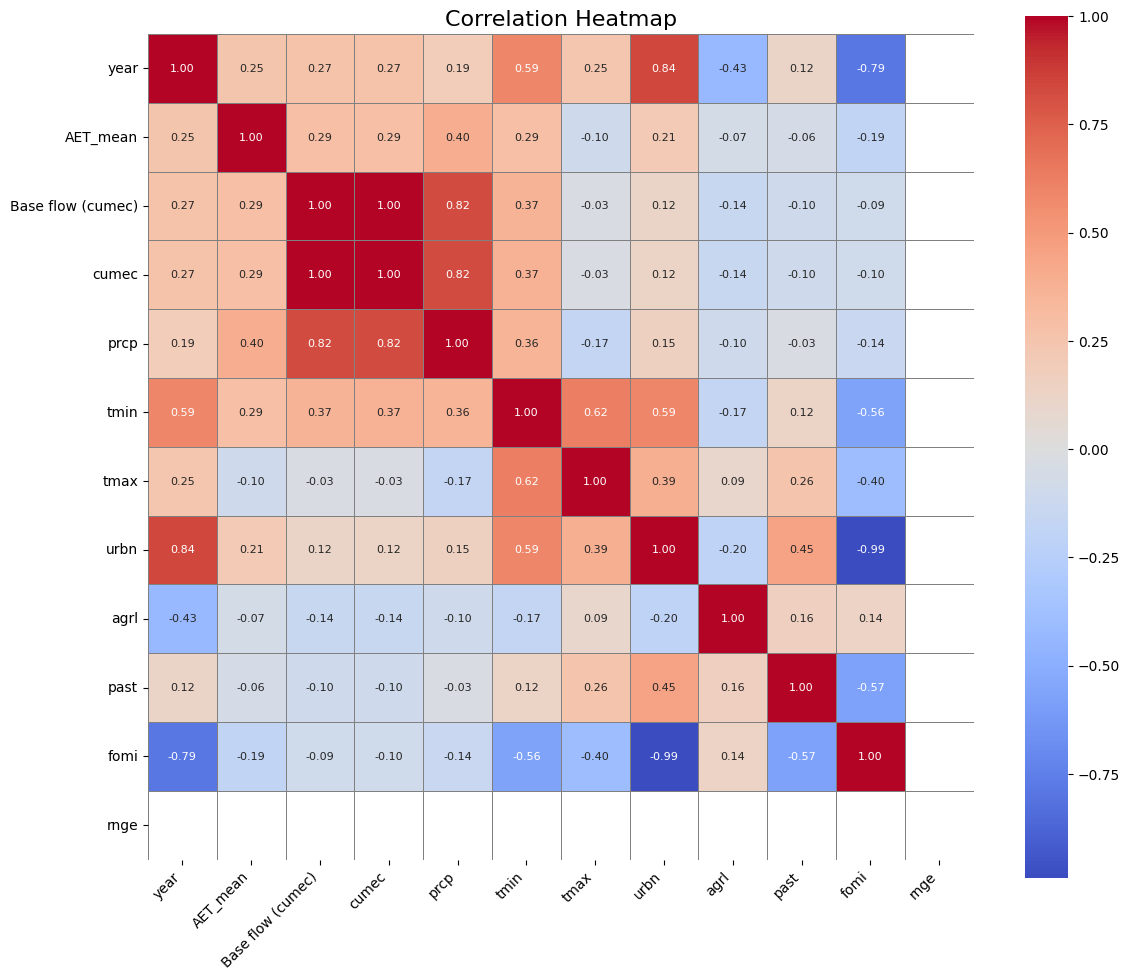

In [278]:
df_corr = df.dropna(axis=1, how='all')
df_corr = df_corr.loc[:, df_corr.nunique() > 1]

numerical_feats = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_feats.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar=True, linewidths=0.5, linecolor='gray',
            annot_kws={"size": 8}, mask=correlation_matrix.isnull())

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- **Streamflow**, **Baseflow(cumec)**, and **prcp** show strong positive correlations (ρ ≈ 0.88–1.00), indicating that precipitation and baseflow are key contributors to streamflow.

- **soil_moisture_avg** is moderately correlated with **streamflow **(ρ ≈ 0.64), suggesting that wetter soils enhance runoff and flow.

- **tmin** and **tmax** have a strong positive correlation (ρ ≈ 0.84), reflecting consistent temperature trends.

- **agrl (agricultural land)** shows weak to moderate negative correlations with streamflow (ρ ≈ -0.26) and very strong inverse relation with** mge (ρ ≈ -0.96)**, indicating possible land cover trade-offs.

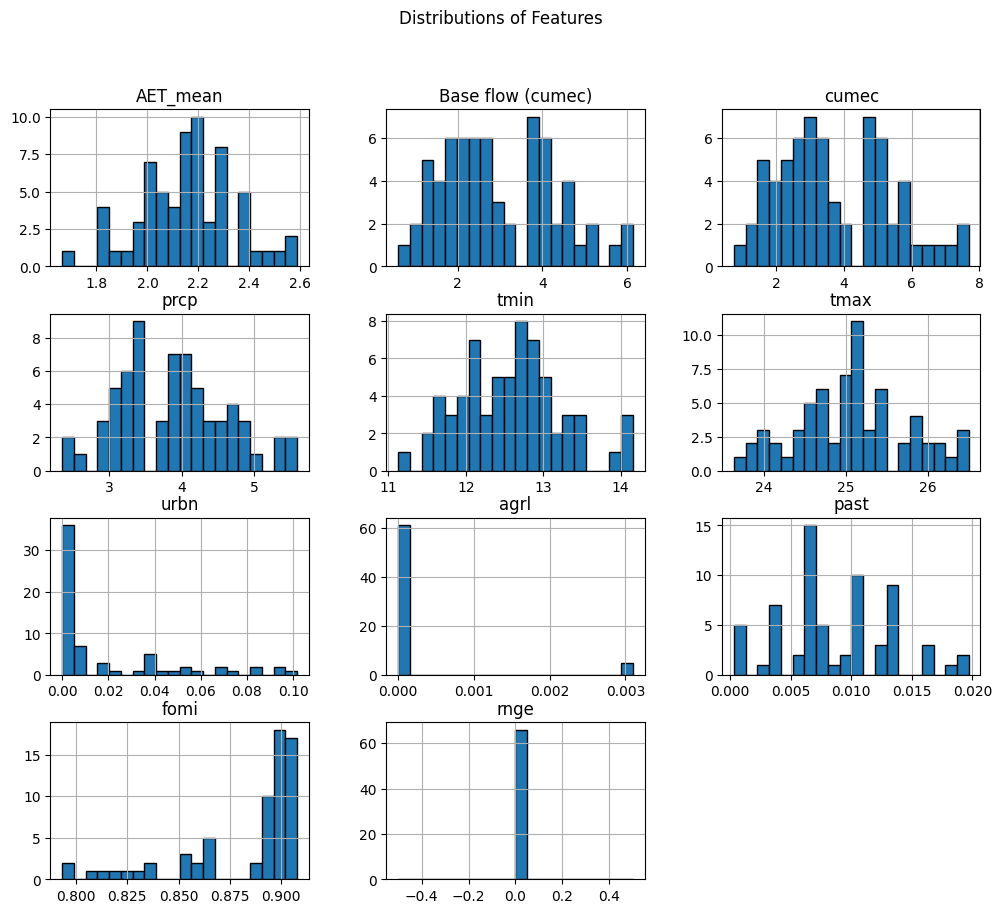

In [279]:
# Histogram of each feature
df.drop(columns='year').hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle("Distributions of Features")
plt.show()

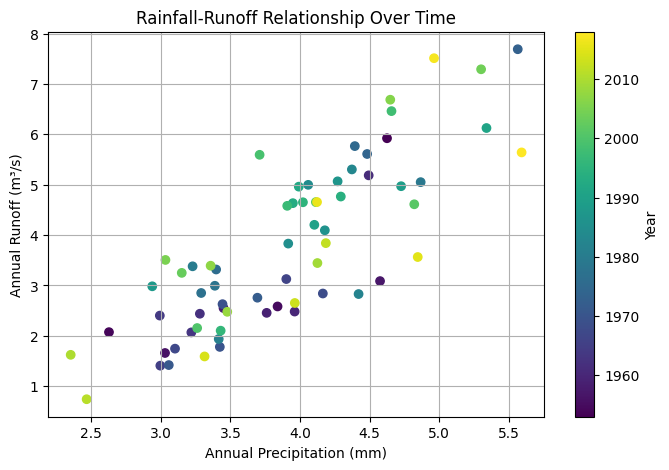

In [280]:
#Plot rainfall-runoff relationship over time
plt.figure(figsize=(8, 5))
plt.scatter(df['prcp'], df['cumec'], c=df['year'], cmap='viridis')
plt.xlabel("Annual Precipitation (mm)")
plt.ylabel("Annual Runoff (m³/s)")
plt.title("Rainfall-Runoff Relationship Over Time")
plt.colorbar(label='Year')
plt.grid(True)
plt.show()

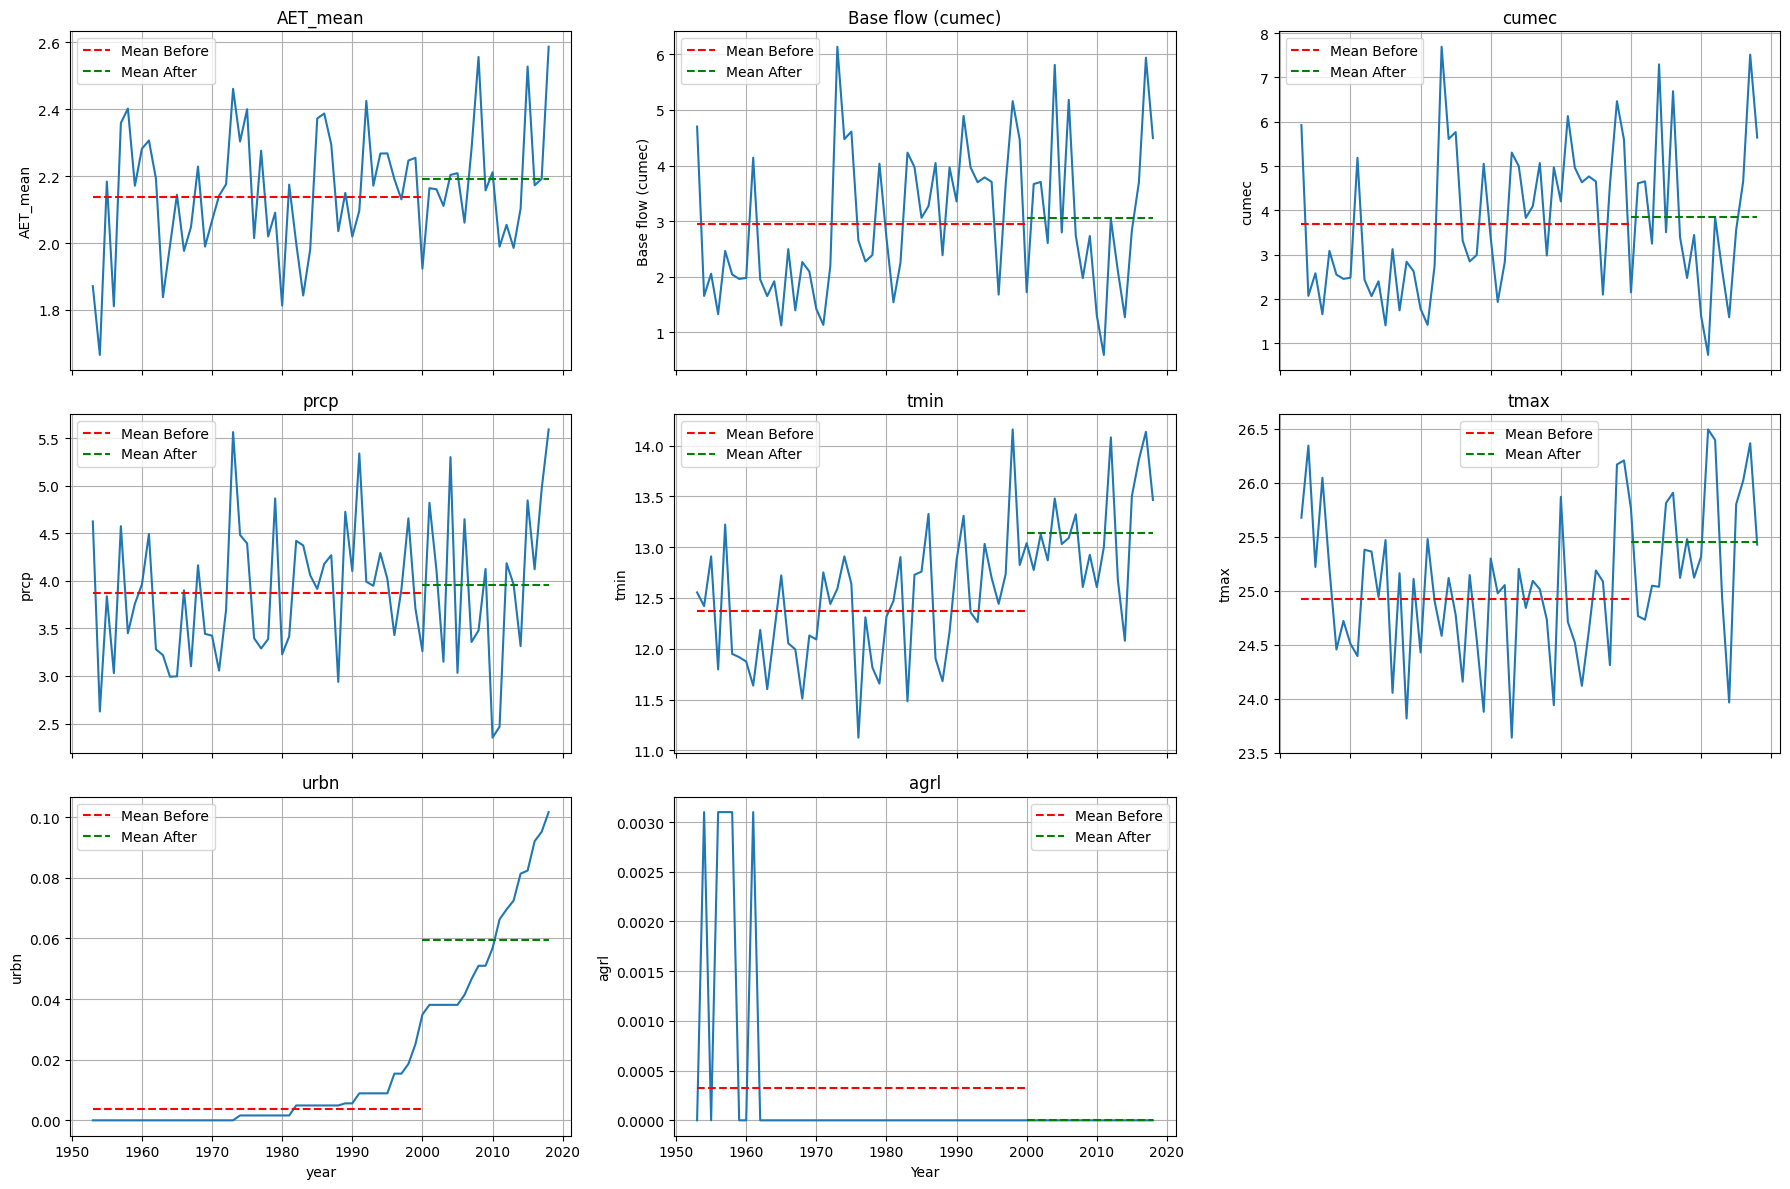

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['AET_mean','Base flow (cumec)','cumec','prcp','tmin','tmax',
            'urbn','agrl']
change_point = 2000

n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows), sharex=True)
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    # Plot line
    sns.lineplot(x=df['year'], y=df[feature], ax=ax)

    # Mean before/after change point
    mean_before = df[df['year'] < change_point][feature].mean()
    mean_after = df[df['year'] >= change_point][feature].mean()

    # Horizontal mean lines
    ax.hlines(mean_before, xmin=df['year'].min(), xmax=change_point, colors='red', linestyles='dashed', label='Mean Before')
    ax.hlines(mean_after, xmin=change_point, xmax=df['year'].max(), colors='green', linestyles='dashed', label='Mean After')

    ax.set_title(f"{feature}")
    ax.set_ylabel(feature)
    ax.grid(True)
    ax.legend()

# Remove unused subplots if features < total grid size
for j in range(i + 1, len(axes)):
     fig.delaxes(axes[j])
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [282]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def seq_mk(data):
    """
    Sequential Mann-Kendall test.
    Input: 2-column NumPy array or DataFrame with [year, values]
    Output: DataFrame with columns [u_prog, u_retr, turning_point]
    """
    year = data[:, 0]
    values = data[:, 1]
    m = len(values)

    # Progressive series
    n = np.zeros((m, m))
    for j in range(m):
        for i in range(j):
            n[j, i] = 1 if values[j] > values[i] else 0
    num = np.sum(n, axis=1)
    t = np.cumsum(num)
    var = np.array([i * (i - 1) * (2 * i + 5) / 72 for i in range(1, m + 1)])
    mean = np.array([i * (i - 1) / 4 for i in range(1, m + 1)])
    u_prog = (t - mean) / np.sqrt(var)

    # Retrograde series
    values_rev = values[::-1]
    n1 = np.zeros((m, m))
    for j in range(m):
        for i in range(j):
            n1[j, i] = 1 if values_rev[j] > values_rev[i] else 0
    num1 = np.sum(n1, axis=1)
    t1 = np.cumsum(num1)
    var1 = var
    mean1 = mean
    u_retr = (t1 - mean1) / np.sqrt(var1)
    u_retr = u_retr[::-1]

    # Turning points
    diff = u_prog - u_retr
    turning_point = np.zeros(m)
    for i in range(1, m - 2):
        if np.sign(diff[i]) != np.sign(diff[i + 1]):
            turning_point[i + 1] = 1

    # Plot
    # plt.figure(figsize=(10, 5))
    # plt.plot(year, u_prog, 'r', label='Progressive Series')
    # plt.plot(year, u_retr, 'b', label='Retrograde Series')
    # plt.grid(True)
    # plt.title('Sequential Mann-Kendall Test')
    # plt.xlabel('Year')
    # plt.legend()
    # plt.show()

    return pd.DataFrame({
        'year': year,
        'u_prog': u_prog,
        'u_retr': u_retr,
        'turning_point': turning_point.astype(int)
    })


In [283]:
#Applying S M Test to streamflow
df = pd.read_csv('df.csv')
data_array = df[['year', 'cumec']].to_numpy()
result = seq_mk(data_array)

# View detected change years
change_years = result[result['turning_point'] == 1]['year'].drop_duplicates().sort_values().astype(int).tolist()
print("Non-stationary turning point years:", change_years)

Non-stationary turning point years: [1965, 1975]


In [284]:
features = ['AET_mean','Base flow (cumec)','cumec','prcp','tmin','tmax',
            'urbn','agrl']

for feat in features:
    print(f"Testing variable: {feat}")
    data_array = df[['year', feat]].to_numpy()
    result = seq_mk(data_array)
    turning_years = result[result['turning_point'] == 1]['year'].values
    if len(turning_years) > 0:
        print("Turning points found in year(s):", turning_years)
    else:
        print("No turning point found.")
    print('\n')

Testing variable: AET_mean
Turning points found in year(s): [1984. 1986. 1991. 1992.]


Testing variable: Base flow (cumec)
Turning points found in year(s): [1965. 1975. 1982. 1984.]


Testing variable: cumec
Turning points found in year(s): [1965. 1975.]


Testing variable: prcp
Turning points found in year(s): [1965. 1974. 1981. 1983.]


Testing variable: tmin
No turning point found.


Testing variable: tmax
Turning points found in year(s): [1993. 2000. 2004. 2006.]


Testing variable: urbn
No turning point found.


Testing variable: agrl
Turning points found in year(s): [1987.]




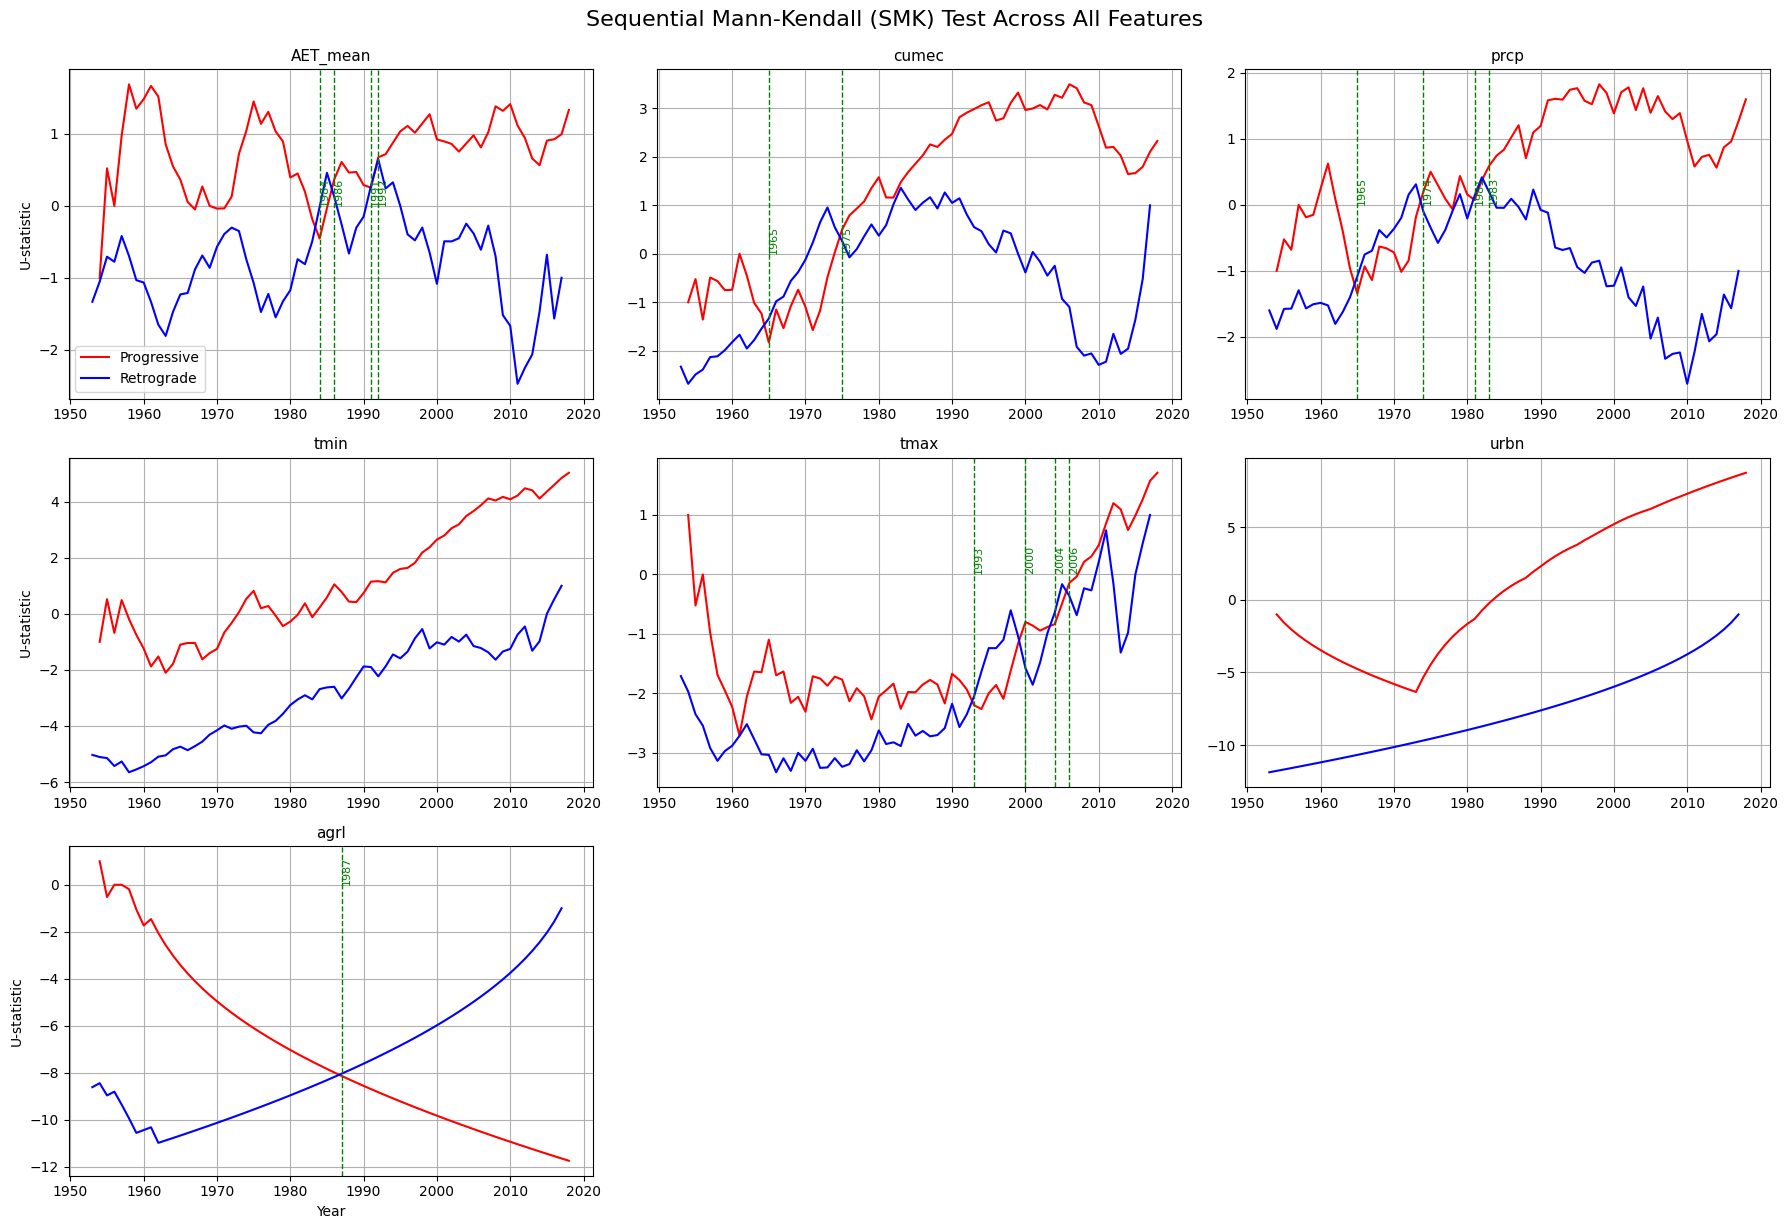

In [285]:
df = pd.read_csv("df.csv")

# List of features to analyze
features = ['AET_mean', 'cumec', 'prcp', 'tmin', 'tmax',
            'urbn', 'agrl']

# Plot configuration
cols = 3
rows = math.ceil(len(features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

# Sequential MK for each feature
for idx, feature in enumerate(features):
    ax = axes[idx]
    data_array = df[['year', feature]].to_numpy()
    result = seq_mk(data_array)

    year = result['year']
    u_prog = result['u_prog']
    u_retr = result['u_retr']
    turning_years = result[result['turning_point'] == 1]['year'].values

    ax.plot(year, u_prog, 'r', label='Progressive')
    ax.plot(year, u_retr, 'b', label='Retrograde')

    for ty in turning_years:
        ax.axvline(ty, color='green', linestyle='--', linewidth=1)
        ax.text(ty, 0, f'{int(ty)}', color='green', fontsize=8, rotation=90, va='bottom')

    ax.set_title(f"{feature}", fontsize=11)
    ax.grid(True)

    if idx % cols == 0:
        ax.set_ylabel("U-statistic")
    if idx >= (rows - 1) * cols:
        ax.set_xlabel("Year")

# Remove empty subplots if any
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Final touches
fig.tight_layout()
fig.suptitle("Sequential Mann-Kendall (SMK) Test Across All Features", fontsize=16, y=1.02)
axes[0].legend()
plt.show()

In [286]:
df['urban_precip'] = df['urbn'] * df['prcp']
df['urban_tmin'] = df['urbn'] * df['tmin']

In [288]:
# Dataset bounds
turning_points = change_years.copy()
start_year = 1953
end_year = 2018
min_interval_gap = 10  # minimum gap in years

# Step 1: Filter turning points with ~10-year separation
filtered_tp = []
last_added = 1953
for year in turning_points:
    if last_added is None or (year - last_added >= min_interval_gap):
        filtered_tp.append(year)
        last_added = year

# Step 2: Add start_year if far enough from first filtered_tp
if filtered_tp and (filtered_tp[0] - start_year >= min_interval_gap):
    filtered_tp = [start_year] + filtered_tp

# Step 3: Add end_year if needed
if filtered_tp[-1] < end_year:
    filtered_tp.append(end_year)

# Step 4: Form intervals
intervals = [(filtered_tp[i], filtered_tp[i + 1]) for i in range(len(filtered_tp) - 1)]

# Output
print("Filtered Turning Points:", filtered_tp)
print("Intervals:", intervals)

Filtered Turning Points: [1953, 1965, 1975, 2018]
Intervals: [(1953, 1965), (1965, 1975), (1975, 2018)]


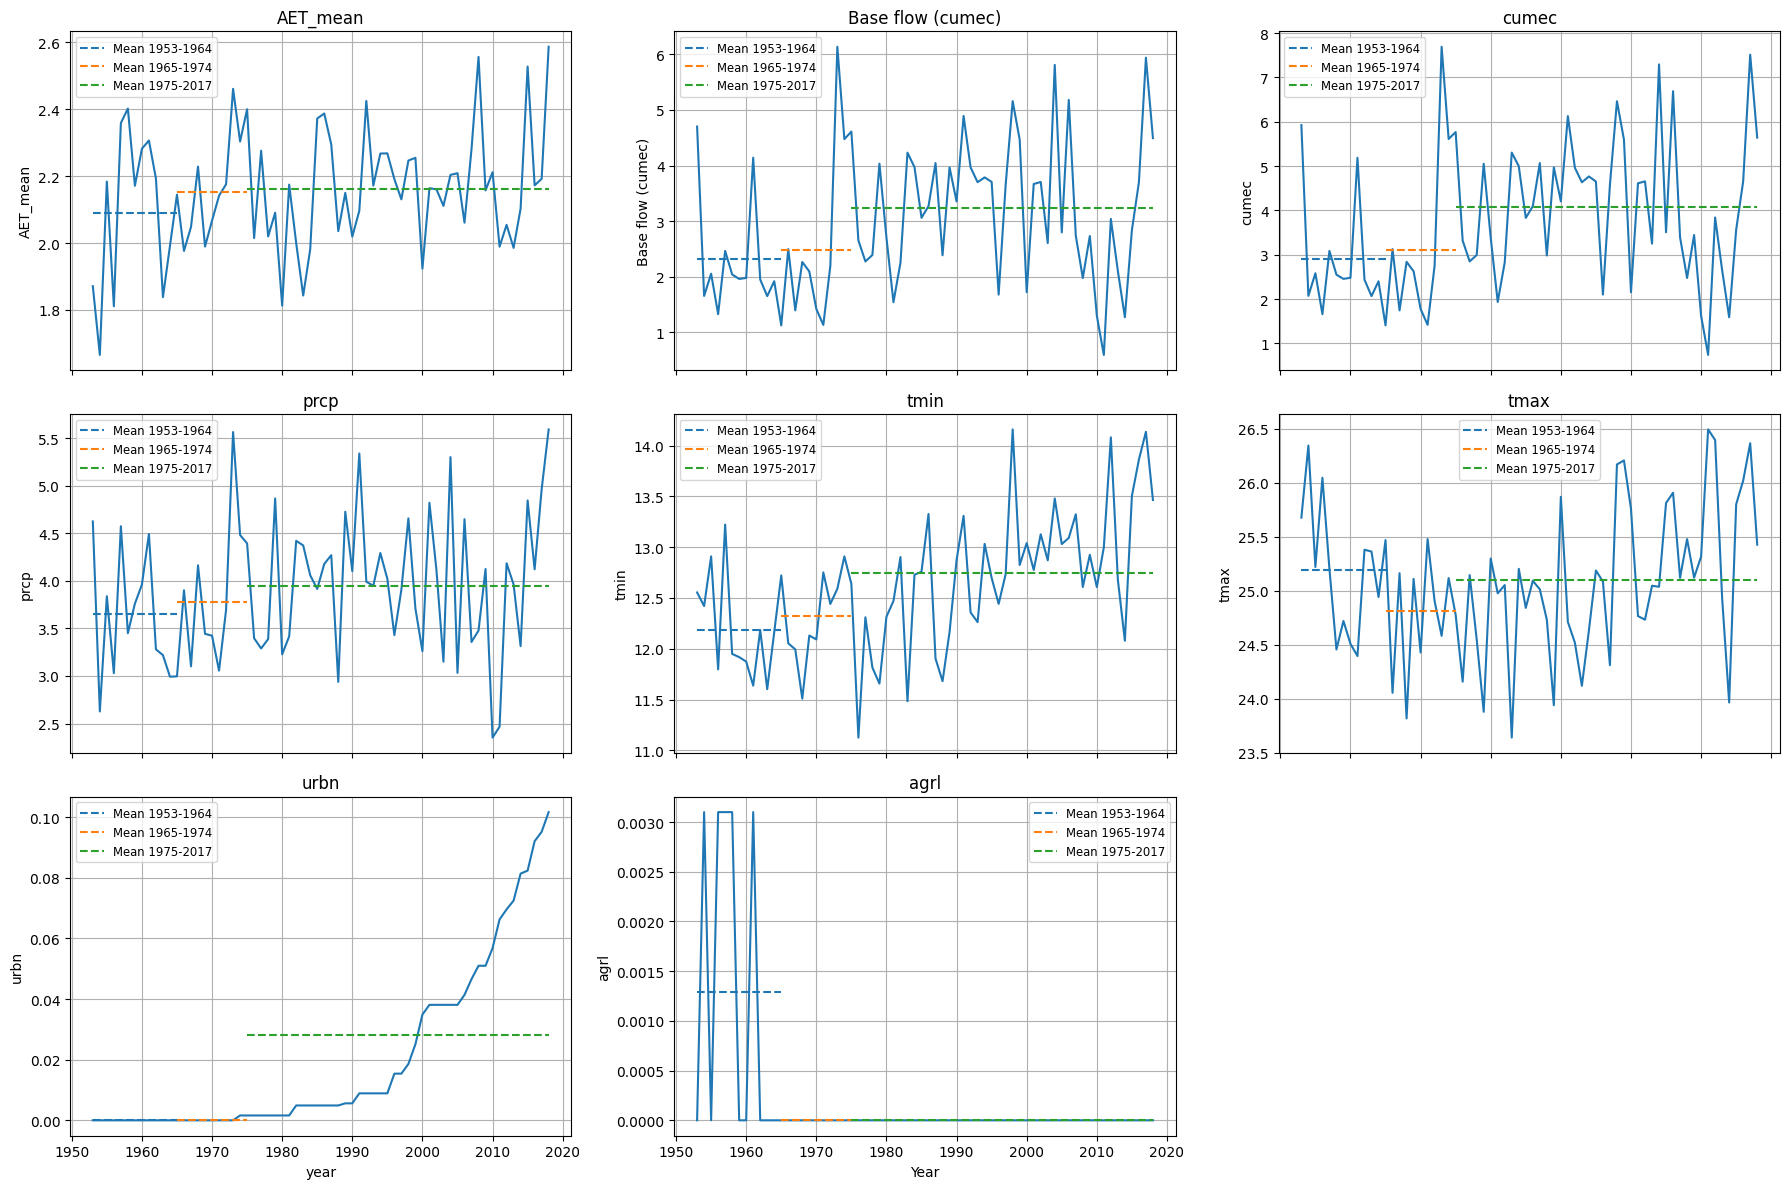

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features = ['AET_mean', 'Base flow (cumec)', 'cumec', 'prcp', 'tmin', 'tmax', 'urbn', 'agrl']
change_points = turning_points
all_years = [df['year'].min()] + change_points + [df['year'].max()]

n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows), sharex=True)
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    # Plot time series
    sns.lineplot(x=df['year'], y=df[feature], ax=ax)

    # Plot means between change points
    for j in range(len(all_years) - 1):
        start_year = all_years[j]
        end_year = all_years[j + 1]

        mask = (df['year'] >= start_year) & (df['year'] < end_year)
        mean_val = df.loc[mask, feature].mean()

        ax.hlines(mean_val, xmin=start_year, xmax=end_year,
                  colors='C'+str(j), linestyles='dashed',
                  label=f'Mean {start_year}-{end_year-1}')

    ax.set_title(f"{feature}")
    ax.set_ylabel(feature)
    ax.grid(True)
    ax.legend(fontsize='small')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.xlabel("Year")
plt.tight_layout()
plt.show()


# Model training

[1965, 1975]
 Processing interval: 1953 to 1965
 Processing interval: 1965 to 1975
 Processing interval: 1975 to 2018


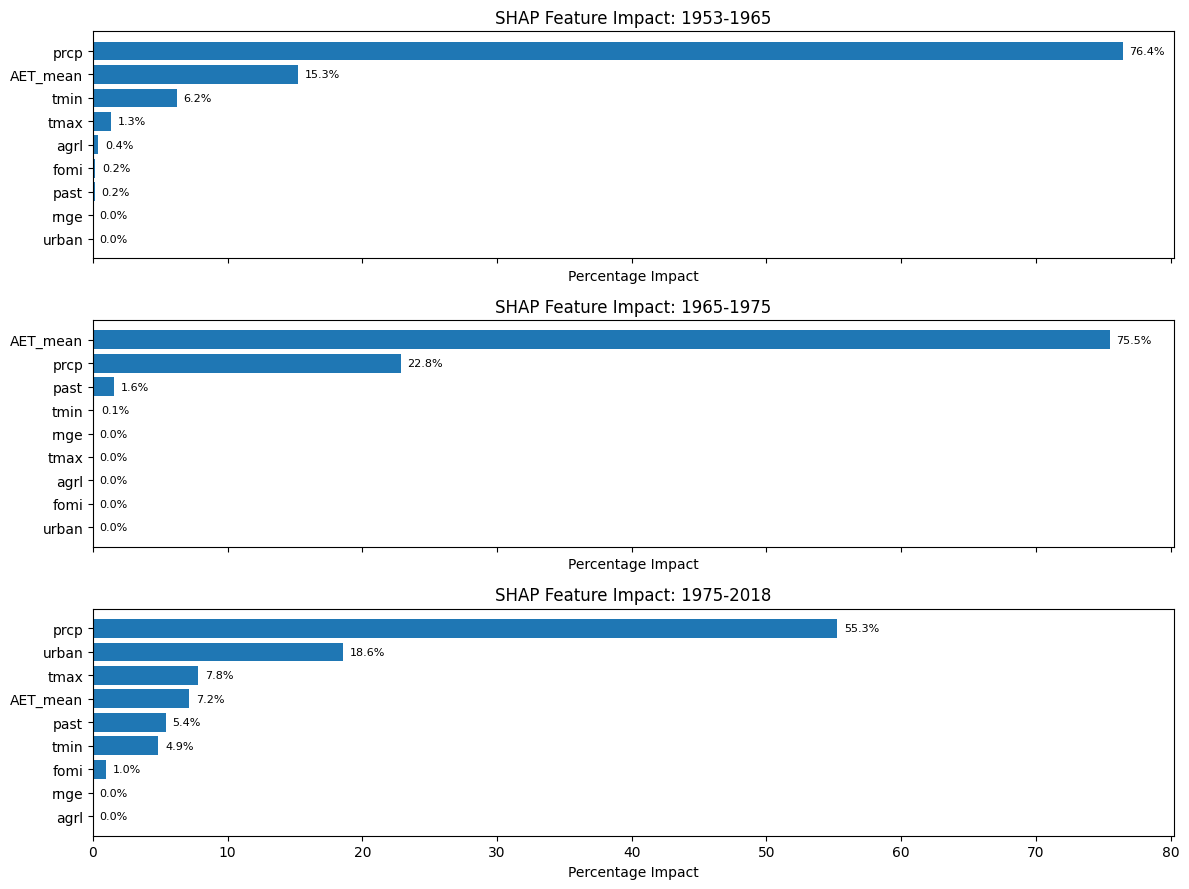

In [289]:
df = df.copy()
print(turning_points)
target = 'cumec'
features = [col for col in df.columns if col not in ['year', target, 'Base flow (cumec)']]
group_map = {
    "urban": ["urban_precip", "urbn", "urban_tmin"]
}

# Best model params
best_params = {
    'colsample_bytree': 1,
    'learning_rate': 0.01,
    'max_depth': 3,
    'n_estimators': 300,
    'subsample': 0.8
}

intervals = intervals

# Function to compute percentage impact
def get_percentage_impact(shap_vals, columns, group_map):
    df_shap = pd.DataFrame(shap_vals, columns=columns)
    grouped_shap = {}

    for group_name, feature_list in group_map.items():
        grouped_shap[group_name] = df_shap[feature_list].abs().sum(axis=1)

    for col in columns:
        if not any(col in v for v in group_map.values()):
            grouped_shap[col] = df_shap[col].abs()

    grouped_df = pd.DataFrame(grouped_shap)
    mean_abs = grouped_df.mean()
    pct = 100 * mean_abs / mean_abs.sum()
    return pct.sort_values()

# Store all results
interval_importances = {}

for start, end in intervals:
    print(f" Processing interval: {start} to {end}")

    df_interval = df[(df['year'] >= start) & (df['year'] < end)]
    X = df_interval[features].copy()
    y = df_interval[target]
    bool_cols = X.select_dtypes(include='bool').columns
    X[bool_cols] = X[bool_cols].astype(int)

    model = xgb.XGBRegressor(**best_params, random_state=42)
    model.fit(X, y)

    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)

    # SHAP values array
    shap_vals = shap_values.values if hasattr(shap_values, 'values') else shap_values

    impact = get_percentage_impact(shap_vals, features, group_map)
    interval_importances[f"{start}-{end}"] = impact

# =======================
# Plot All Intervals
# =======================
fig, axes = plt.subplots(nrows=len(interval_importances), figsize=(12, len(interval_importances)*3), sharex=True)

for ax, (interval, imp) in zip(axes, interval_importances.items()):
    ax.barh(imp.index, imp.values)
    ax.set_title(f"SHAP Feature Impact: {interval}")
    ax.set_xlabel("Percentage Impact")
    for i, v in enumerate(imp.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=8)

plt.tight_layout()
plt.show();


## Monthly analysis

In [202]:
# ======Data Cleaning ======
aet_df['date'] = pd.to_datetime(aet_df['date'])
streamflow_df['date'] = pd.to_datetime(streamflow_df['date'], format='%m/%d/%Y')
baseflow_df['date'] = pd.to_datetime(baseflow_df['date'], format='%m/%d/%Y')
climate_df['date'] = pd.to_datetime(climate_df['date'])

#  Extract year and month for monthly grouping
for df in [aet_df, streamflow_df, baseflow_df, climate_df]:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month

# Group by year and month
aet_monthly = aet_df.groupby(['year', 'month'])['AET_mean'].mean().reset_index()
streamflow_monthly = streamflow_df.groupby(['year', 'month'])['cumec'].mean().reset_index()
baseflow_monthly = baseflow_df.groupby(['year', 'month'])['Base flow (cumec)'].mean().reset_index()
climate_monthly = climate_df.groupby(['year', 'month']).agg({
    'prcp': 'mean',
    'tmin': 'mean',
    'tmax': 'mean'
}).reset_index()


In [203]:
# # Find soil moisture CSVs
# soil_files = [os.path.join(base_path, f) for f in os.listdir(base_path)
#               if f.startswith("SW_ID_") and f.endswith(".csv")]

# # Process each file
# soil_dfs = []
# for i, path in enumerate(soil_files):
#     df = pd.read_csv(path)
#     df['date'] = pd.to_datetime(df['date'])
#     df['year'] = df['date'].dt.year
#     df['month'] = df['date'].dt.month
#     df_monthly = df.groupby(['year', 'month'])['soil_moisture'].mean().reset_index()
#     df_monthly.columns = ['year', 'month', f'soil_{8795+i}']
#     soil_dfs.append(df_monthly)

# # Merge and average
# soil_combined = soil_dfs[0]
# for df in soil_dfs[1:]:
#     soil_combined = soil_combined.merge(df, on=['year', 'month'], how='outer')
# soil_combined['soil_moisture_avg'] = soil_combined.iloc[:, 2:5].mean(axis=1)
# soil_monthly = soil_combined[['year', 'month', 'soil_moisture_avg']]


In [204]:
# ===== LULC =====
lulc_monthly = lulc_df.loc[lulc_df.index.repeat(12)].copy()
lulc_monthly['month'] = list(range(1, 13)) * lulc_df.shape[0]
lulc_monthly = lulc_monthly.sort_values(['year', 'month']).reset_index(drop=True)


In [205]:
df_monthly = aet_monthly \
    .merge(baseflow_monthly, on=['year', 'month']) \
    .merge(streamflow_monthly, on=['year', 'month']) \
    .merge(climate_monthly, on=['year', 'month']) \
    .merge(lulc_monthly, on=['year', 'month'])

df_monthly = df_monthly.dropna()

df_monthly = aet_monthly \
    .merge(baseflow_monthly, on=['year', 'month']) \
    .merge(streamflow_monthly, on=['year', 'month']) \
    .merge(climate_monthly, on=['year', 'month']) \
    .merge(lulc_monthly, on=['year', 'month'])

df_monthly = df_monthly.dropna()

print(f"Shape: {df_monthly.shape}")
print('\n')
print(df_monthly.head())

Shape: (789, 17)


   year  month  AET_mean  Base flow (cumec)      cumec       prcp       tmin  \
0  1953      1  0.583884           1.910381   2.477263   2.451741   4.776238   
1  1953      2  0.816403           6.706953   8.405033   6.489219   5.023421   
2  1953      3  0.946147           3.309123   4.121465   3.062908  12.463922   
3  1953      4  1.284196          11.491697  15.090967   9.570047  11.506437   
4  1953      5  2.992212          18.721938  23.146700  11.184686  17.678627   

        tmax  urbn  agrl    past    fomi  rngb  rnge    wehb  wetn  bsvg  
0  18.717121   0.0   0.0  0.0197  0.8917   0.0   0.0  0.0886   0.0   0.0  
1  16.718589   0.0   0.0  0.0197  0.8917   0.0   0.0  0.0886   0.0   0.0  
2  23.972142   0.0   0.0  0.0197  0.8917   0.0   0.0  0.0886   0.0   0.0  
3  25.207965   0.0   0.0  0.0197  0.8917   0.0   0.0  0.0886   0.0   0.0  
4  29.080061   0.0   0.0  0.0197  0.8917   0.0   0.0  0.0886   0.0   0.0  


In [206]:
print(df_monthly.isnull().sum())
print('\n')
print(df_monthly.info())

year                 0
month                0
AET_mean             0
Base flow (cumec)    0
cumec                0
prcp                 0
tmin                 0
tmax                 0
urbn                 0
agrl                 0
past                 0
fomi                 0
rngb                 0
rnge                 0
wehb                 0
wetn                 0
bsvg                 0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               789 non-null    int32  
 1   month              789 non-null    int32  
 2   AET_mean           789 non-null    float64
 3   Base flow (cumec)  789 non-null    float64
 4   cumec              789 non-null    float64
 5   prcp               789 non-null    float64
 6   tmin               789 non-null    float64
 7   tmax               789 non-null    float64
 8   urbn

In [207]:
print(df_monthly.describe())

              year       month    AET_mean  Base flow (cumec)       cumec  \
count   789.000000  789.000000  789.000000         789.000000  789.000000   
mean   1985.376426    6.482890    2.152861           2.981444    3.741362   
std      18.992692    3.449236    1.540187           3.069376    3.898869   
min    1953.000000    1.000000    0.000000           0.095346    0.118492   
25%    1969.000000    3.000000    0.701424           1.091595    1.362982   
50%    1985.000000    6.000000    1.710882           1.910381    2.384092   
75%    2002.000000    9.000000    3.417036           3.946252    4.925896   
max    2018.000000   12.000000    6.268131          33.044755   42.859030   

             prcp        tmin        tmax        urbn        agrl        past  \
count  789.000000  789.000000  789.000000  789.000000  789.000000  789.000000   
mean     3.889743   12.571176   25.057880    0.019548    0.000236    0.008661   
std      2.403146    6.829530    6.807925    0.027862    0.0008

In [208]:
df_monthly.drop(columns=['rngb', 'wehb', 'bsvg','wetn'], axis=1, inplace=True)

In [209]:
df_monthly.head()

,year,month,AET_mean,Base flow (cumec),cumec,prcp,tmin,tmax,urbn,agrl,past,fomi,rnge
0,1953,1,0.583884,1.910381,2.477263,2.451741,4.776238,18.717121,0.0,0.0,0.0197,0.8917,0.0
1,1953,2,0.816403,6.706953,8.405033,6.489219,5.023421,16.718589,0.0,0.0,0.0197,0.8917,0.0
2,1953,3,0.946147,3.309123,4.121465,3.062908,12.463922,23.972142,0.0,0.0,0.0197,0.8917,0.0
3,1953,4,1.284196,11.491697,15.090967,9.570047,11.506437,25.207965,0.0,0.0,0.0197,0.8917,0.0
4,1953,5,2.992212,18.721938,23.146700,11.184686,17.678627,29.080061,0.0,0.0,0.0197,0.8917,0.0


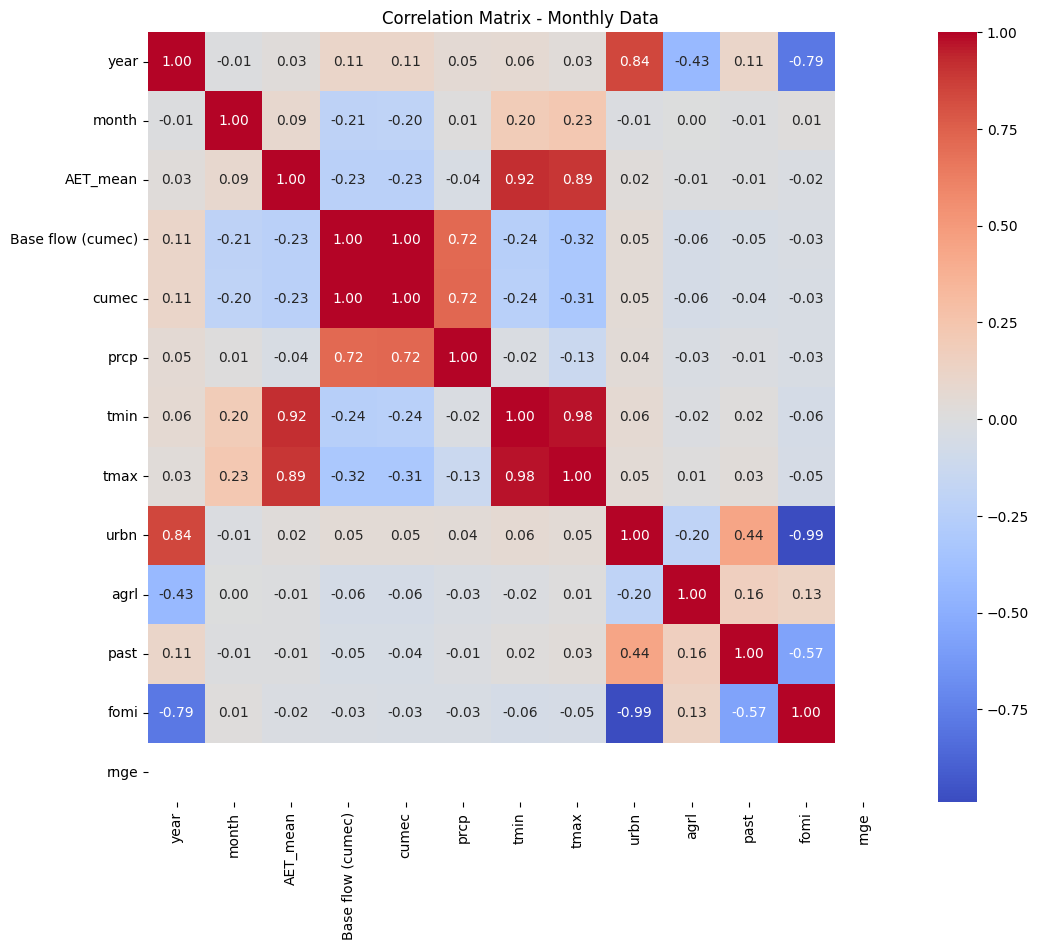

In [210]:
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df_monthly.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Monthly Data")
plt.show()

In [211]:
11%12

11

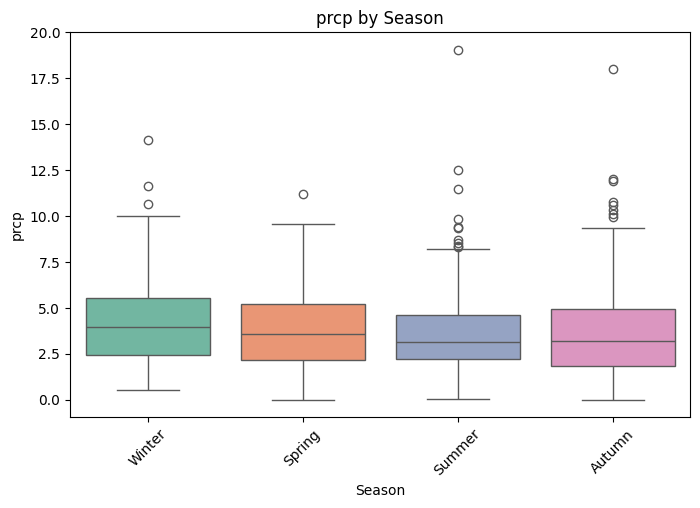

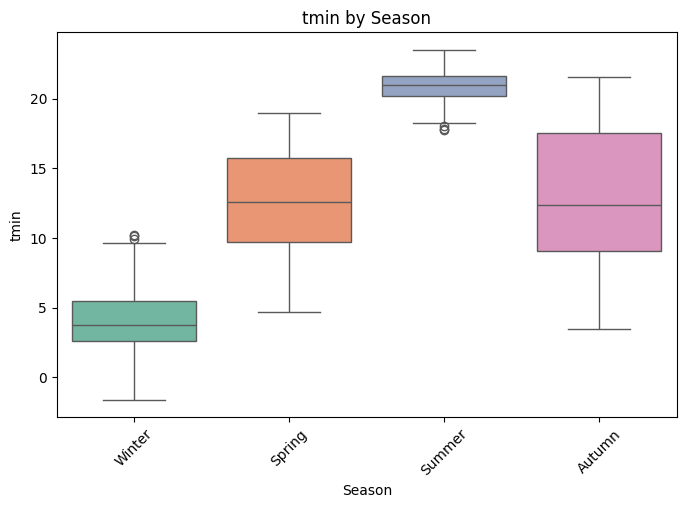

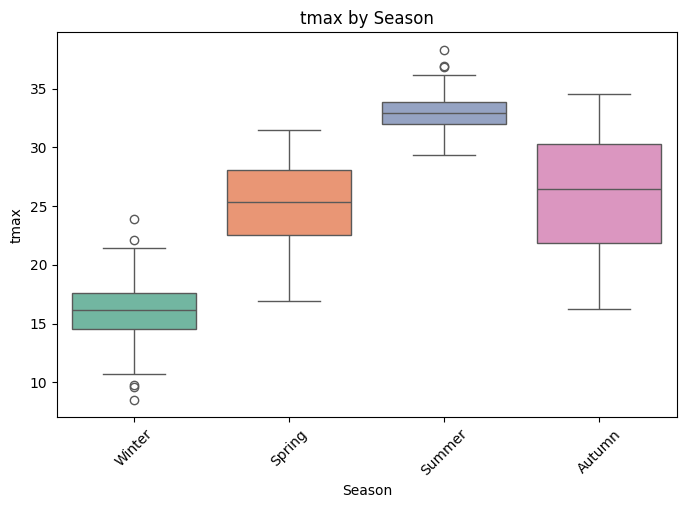

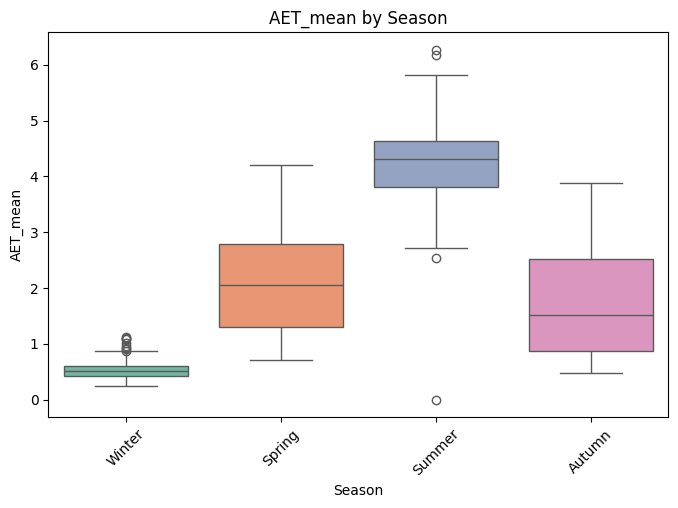

In [212]:
# Seasonal trend analysis
season_labels = ['Winter', 'Spring', 'Summer', 'Autumn']
df_monthly['season'] = df_monthly['month'] % 12 // 3 + 1
df_monthly['season'] = df_monthly['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'})

variables = ['prcp', 'tmin', 'tmax', 'AET_mean']

for var in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='season', y=var, data=df_monthly, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'{var} by Season')
    plt.xlabel('Season')
    plt.ylabel(var)
    plt.show();

In [213]:
print(df_monthly['season'].value_counts())

season
Spring    198
Summer    198
Winter    197
Autumn    196
Name: count, dtype: int64


- Precipitation:
  - Winter has lowest Precipitation
  - Summer and Autumn have high values
  - Interpretation - Most rainfall occurs in Summer

- TMin:
  - Winter has the lowest Tmin, Summer has the highest Tmax
- TMax:
   - Summer shows the highest tmax (tight spread, consistent heat).
   - Winter has the lowest.

- AET:
   - Summer leads with the highest evapotranspiration due to more heat and possibly moisture.
   - Winter has very low AET, tightly packed (low variability).
- Soil Moisture:
  - Spring has the highest median soil moisture, possibly due to snowmelt or early rains.
  - Summer shows a drop, possibly due to high evapotranspiration.
  - Winter and Autumn have moderate levels.

## One hot encoding

In [214]:
# from sklearn.preprocessing import LabelEncoder

# df_monthly = df_monthly.copy()
# label_encoder = LabelEncoder()

# df_monthly['Season'] = label_encoder.fit_transform(df_monthly['season'])

# Apply One-Hot Encoding
df_monthly = pd.get_dummies(df_monthly, columns=['season'])

In [293]:
df_monthly

,year,month,AET_mean,Base flow (cumec),cumec,prcp,tmin,tmax,urbn,agrl,past,fomi,rnge,season_Autumn,season_Spring,season_Summer,season_Winter,urban_precip,urban_tmin
0,1953,1,0.583884,1.910381,2.477263,2.451741,4.776238,18.717121,0.0000,0.0,0.0197,0.8917,0.0,False,False,False,True,0.000000,0.000000
1,1953,2,0.816403,6.706953,8.405033,6.489219,5.023421,16.718589,0.0000,0.0,0.0197,0.8917,0.0,False,False,False,True,0.000000,0.000000
2,1953,3,0.946147,3.309123,4.121465,3.062908,12.463922,23.972142,0.0000,0.0,0.0197,0.8917,0.0,False,True,False,False,0.000000,0.000000
3,1953,4,1.284196,11.491697,15.090967,9.570047,11.506437,25.207965,0.0000,0.0,0.0197,0.8917,0.0,False,True,False,False,0.000000,0.000000
4,1953,5,2.992212,18.721938,23.146700,11.184686,17.678627,29.080061,0.0000,0.0,0.0197,0.8917,0.0,False,True,False,False,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,2018,5,4.082064,2.081150,2.595006,1.396756,17.713550,31.359965,0.1017,0.0,0.0165,0.7932,0.0,False,True,False,False,0.142050,1.801468
785,2018,6,3.938463,1.603573,2.002281,3.640083,21.562815,33.228212,0.1017,0.0,0.0165,0.7932,0.0,False,False,True,False,0.370196,2.192938
786,2018,7,4.525149,1.549826,1.938970,5.714564,21.892582,34.292010,0.1017,0.0,0.0165,0.7932,0.0,False,False,True,False,0.581171,2.226476
787,2018,8,4.382000,1.262657,1.576241,2.929829,21.504291,33.653701,0.1017,0.0,0.0165,0.7932,0.0,False,False,True,False,0.297964,2.186986


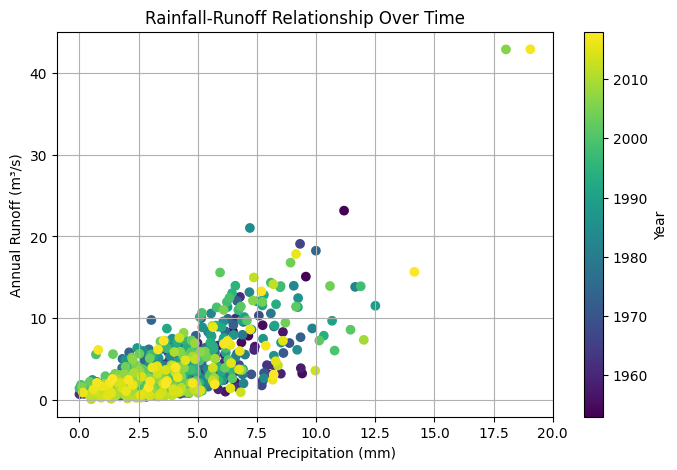

In [294]:
#Plot rainfall-runoff relationship over time
plt.figure(figsize=(8, 5))
plt.scatter(df_monthly['prcp'], df_monthly['cumec'], c=df_monthly['year'], cmap='viridis')
plt.xlabel("Annual Precipitation (mm)")
plt.ylabel("Annual Runoff (m³/s)")
plt.title("Rainfall-Runoff Relationship Over Time")
plt.colorbar(label='Year')
plt.grid(True)
plt.show()

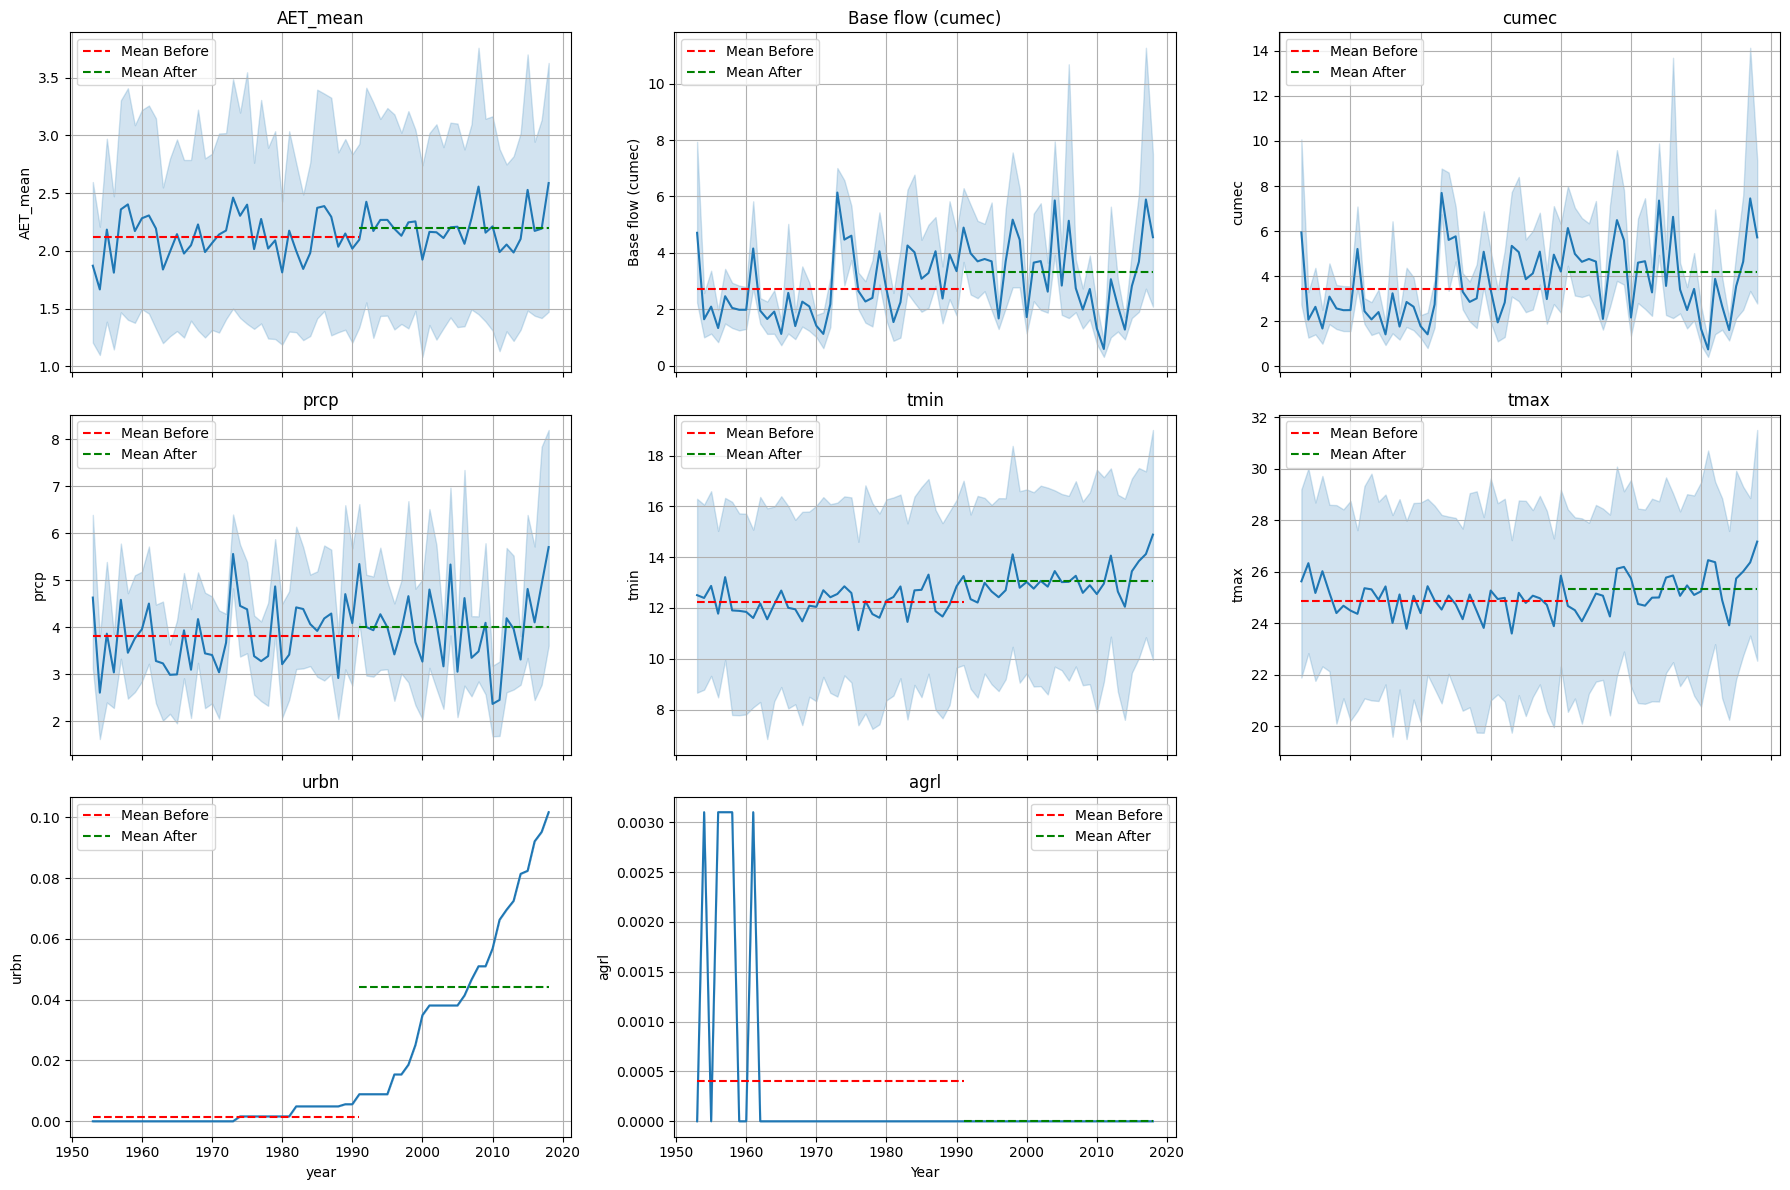

In [295]:
features = ['AET_mean','Base flow (cumec)','cumec','prcp','tmin','tmax',
            'urbn','agrl']
change_point = 1991

n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows), sharex=True)
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    # Plot line
    sns.lineplot(x=df_monthly['year'], y=df_monthly[feature], ax=ax)

    # Mean before/after change point
    mean_before = df_monthly[df_monthly['year'] < change_point][feature].mean()
    mean_after = df_monthly[df_monthly['year'] >= change_point][feature].mean()

    # Horizontal mean lines
    ax.hlines(mean_before, xmin=df_monthly['year'].min(), xmax=change_point, colors='red', linestyles='dashed', label='Mean Before')
    ax.hlines(mean_after, xmin=change_point, xmax=df_monthly['year'].max(), colors='green', linestyles='dashed', label='Mean After')

    ax.set_title(f"{feature}")
    ax.set_ylabel(feature)
    ax.grid(True)
    ax.legend()

# Remove unused subplots if features < total grid size
for j in range(i + 1, len(axes)):
     fig.delaxes(axes[j])
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In [296]:
df_monthly.head()

,year,month,AET_mean,Base flow (cumec),cumec,prcp,tmin,tmax,urbn,agrl,past,fomi,rnge,season_Autumn,season_Spring,season_Summer,season_Winter,urban_precip,urban_tmin
0,1953,1,0.583884,1.910381,2.477263,2.451741,4.776238,18.717121,0.0,0.0,0.0197,0.8917,0.0,False,False,False,True,0.0,0.0
1,1953,2,0.816403,6.706953,8.405033,6.489219,5.023421,16.718589,0.0,0.0,0.0197,0.8917,0.0,False,False,False,True,0.0,0.0
2,1953,3,0.946147,3.309123,4.121465,3.062908,12.463922,23.972142,0.0,0.0,0.0197,0.8917,0.0,False,True,False,False,0.0,0.0
3,1953,4,1.284196,11.491697,15.090967,9.570047,11.506437,25.207965,0.0,0.0,0.0197,0.8917,0.0,False,True,False,False,0.0,0.0
4,1953,5,2.992212,18.721938,23.146700,11.184686,17.678627,29.080061,0.0,0.0,0.0197,0.8917,0.0,False,True,False,False,0.0,0.0


In [297]:
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

for season in seasons:
    season_df = df_monthly[df_monthly['season_' + season] == 1]
    if not season_df.empty:
        data_array = season_df[['year', 'cumec']].to_numpy()
        result = seq_mk(data_array)
        change_years = result[result['turning_point'] == 1]['year'].values
        print(f"{season} - Change years:", change_years)


Winter - Change years: [1954. 1955. 1955. 1956. 1956. 1958. 1958. 1960. 1967. 1979. 1981. 1987.
 1989. 1992.]
Spring - Change years: [1956. 1957. 1959. 1959. 1959. 1976. 1978. 1980. 1981. 1985. 1985. 1990.
 2018. 2018.]
Summer - Change years: [1954. 1961. 1964. 1991. 2015.]
Autumn - Change years: [1956. 1957. 1967. 1975. 1982. 1985.]


In [298]:
# SMK TEST
# Exclude first and last 5 years
min_year = df_monthly['year'].min() + 5
max_year = df_monthly['year'].max() - 5
filtered_df = df_monthly[(df_monthly['year'] >= min_year) & (df_monthly['year'] <= max_year)]

# Select year and cumec for SMK
data_array = filtered_df[['year', 'cumec']].to_numpy()

# Run Sequential Mann-Kendall test
result = seq_mk(data_array)

# View detected change years
turning_points = result[result['turning_point'] == 1]['year'].drop_duplicates().sort_values().astype(int).tolist()
print("Non-stationary turning point years:", turning_points)


Non-stationary turning point years: [1958, 1959, 1960, 1961, 1963, 1964, 1976, 1977, 1978, 1979, 1980, 1992, 1993, 1996, 1997, 1998, 2000, 2003, 2004]


In [299]:
print(change_years)

[1956. 1957. 1967. 1975. 1982. 1985.]


In [300]:
df_monthly.to_csv("df_monthly.csv", index=False)

In [301]:
df_monthly.head()

,year,month,AET_mean,Base flow (cumec),cumec,prcp,tmin,tmax,urbn,agrl,past,fomi,rnge,season_Autumn,season_Spring,season_Summer,season_Winter,urban_precip,urban_tmin
0,1953,1,0.583884,1.910381,2.477263,2.451741,4.776238,18.717121,0.0,0.0,0.0197,0.8917,0.0,False,False,False,True,0.0,0.0
1,1953,2,0.816403,6.706953,8.405033,6.489219,5.023421,16.718589,0.0,0.0,0.0197,0.8917,0.0,False,False,False,True,0.0,0.0
2,1953,3,0.946147,3.309123,4.121465,3.062908,12.463922,23.972142,0.0,0.0,0.0197,0.8917,0.0,False,True,False,False,0.0,0.0
3,1953,4,1.284196,11.491697,15.090967,9.570047,11.506437,25.207965,0.0,0.0,0.0197,0.8917,0.0,False,True,False,False,0.0,0.0
4,1953,5,2.992212,18.721938,23.146700,11.184686,17.678627,29.080061,0.0,0.0,0.0197,0.8917,0.0,False,True,False,False,0.0,0.0


In [302]:
# Dataset bounds
start_year = 1953
end_year = 2018
min_interval_gap = 10  # minimum gap in years

# Step 1: Filter turning points with ~10-year separation
filtered_tp = []
last_added = 1953
for year in turning_points:
    if last_added is None or (year - last_added >= min_interval_gap):
        filtered_tp.append(year)
        last_added = year

# Step 2: Add start_year if far enough from first filtered_tp
if filtered_tp and (filtered_tp[0] - start_year >= min_interval_gap):
    filtered_tp = [start_year] + filtered_tp

# Step 3: Add end_year if needed
if filtered_tp[-1] < end_year:
    filtered_tp.append(end_year)

# Step 4: Form intervals
intervals = [(filtered_tp[i], filtered_tp[i + 1]) for i in range(len(filtered_tp) - 1)]

# Output
print("Filtered Turning Points:", filtered_tp)
print("Intervals:", intervals)

Filtered Turning Points: [1953, 1963, 1976, 1992, 2003, 2018]
Intervals: [(1953, 1963), (1963, 1976), (1976, 1992), (1992, 2003), (2003, 2018)]


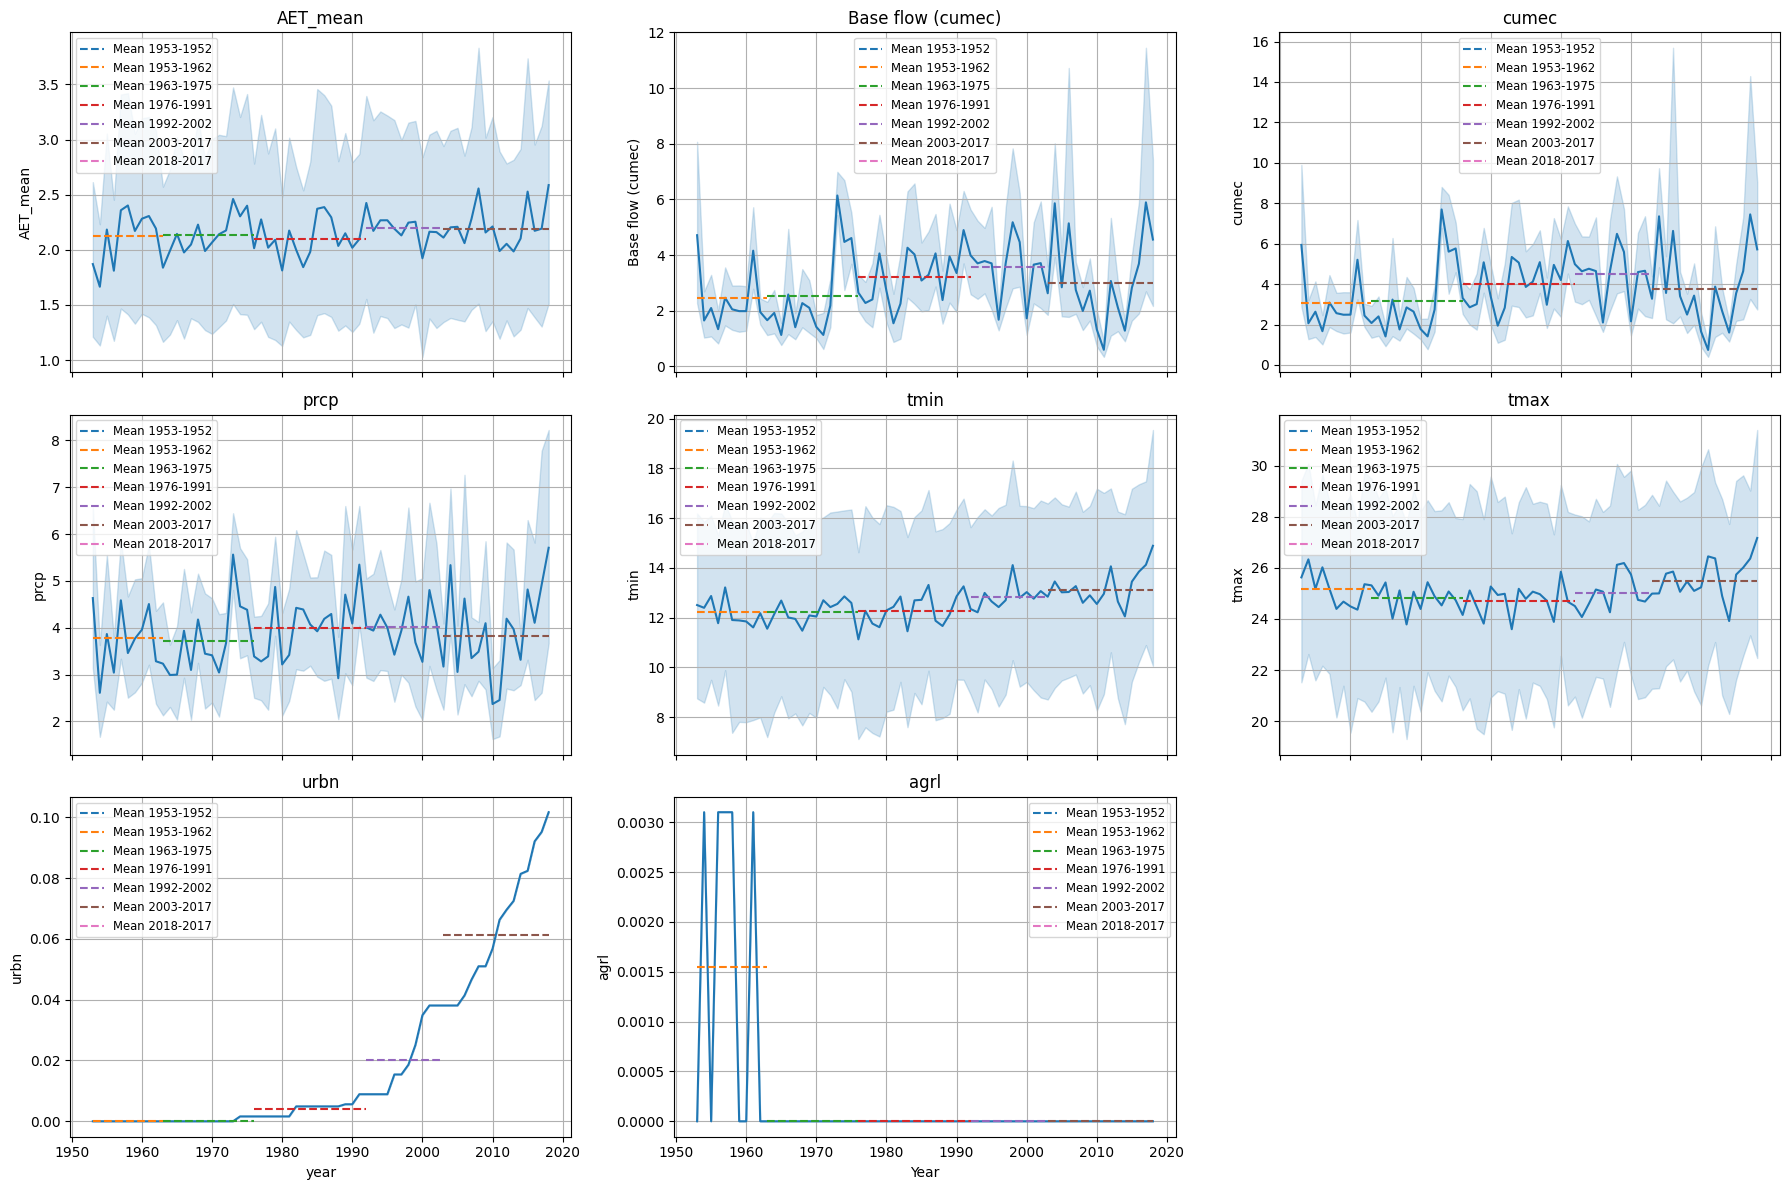

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

features = ['AET_mean', 'Base flow (cumec)', 'cumec', 'prcp', 'tmin', 'tmax', 'urbn', 'agrl']
change_points = filtered_tp
all_years = [df_monthly['year'].min()] + change_points + [df_monthly['year'].max()]

n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows), sharex=True)
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]

    # Plot time series
    sns.lineplot(x=df_monthly['year'], y=df_monthly[feature], ax=ax)

    # Plot means between change points
    for j in range(len(all_years) - 1):
        start_year = all_years[j]
        end_year = all_years[j + 1]

        mask = (df_monthly['year'] >= start_year) & (df_monthly['year'] < end_year)
        mean_val = df_monthly.loc[mask, feature].mean()

        ax.hlines(mean_val, xmin=start_year, xmax=end_year,
                  colors='C'+str(j), linestyles='dashed',
                  label=f'Mean {start_year}-{end_year-1}')

    ax.set_title(f"{feature}")
    ax.set_ylabel(feature)
    ax.grid(True)
    ax.legend(fontsize='small')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.xlabel("Year")
plt.tight_layout()
plt.show()

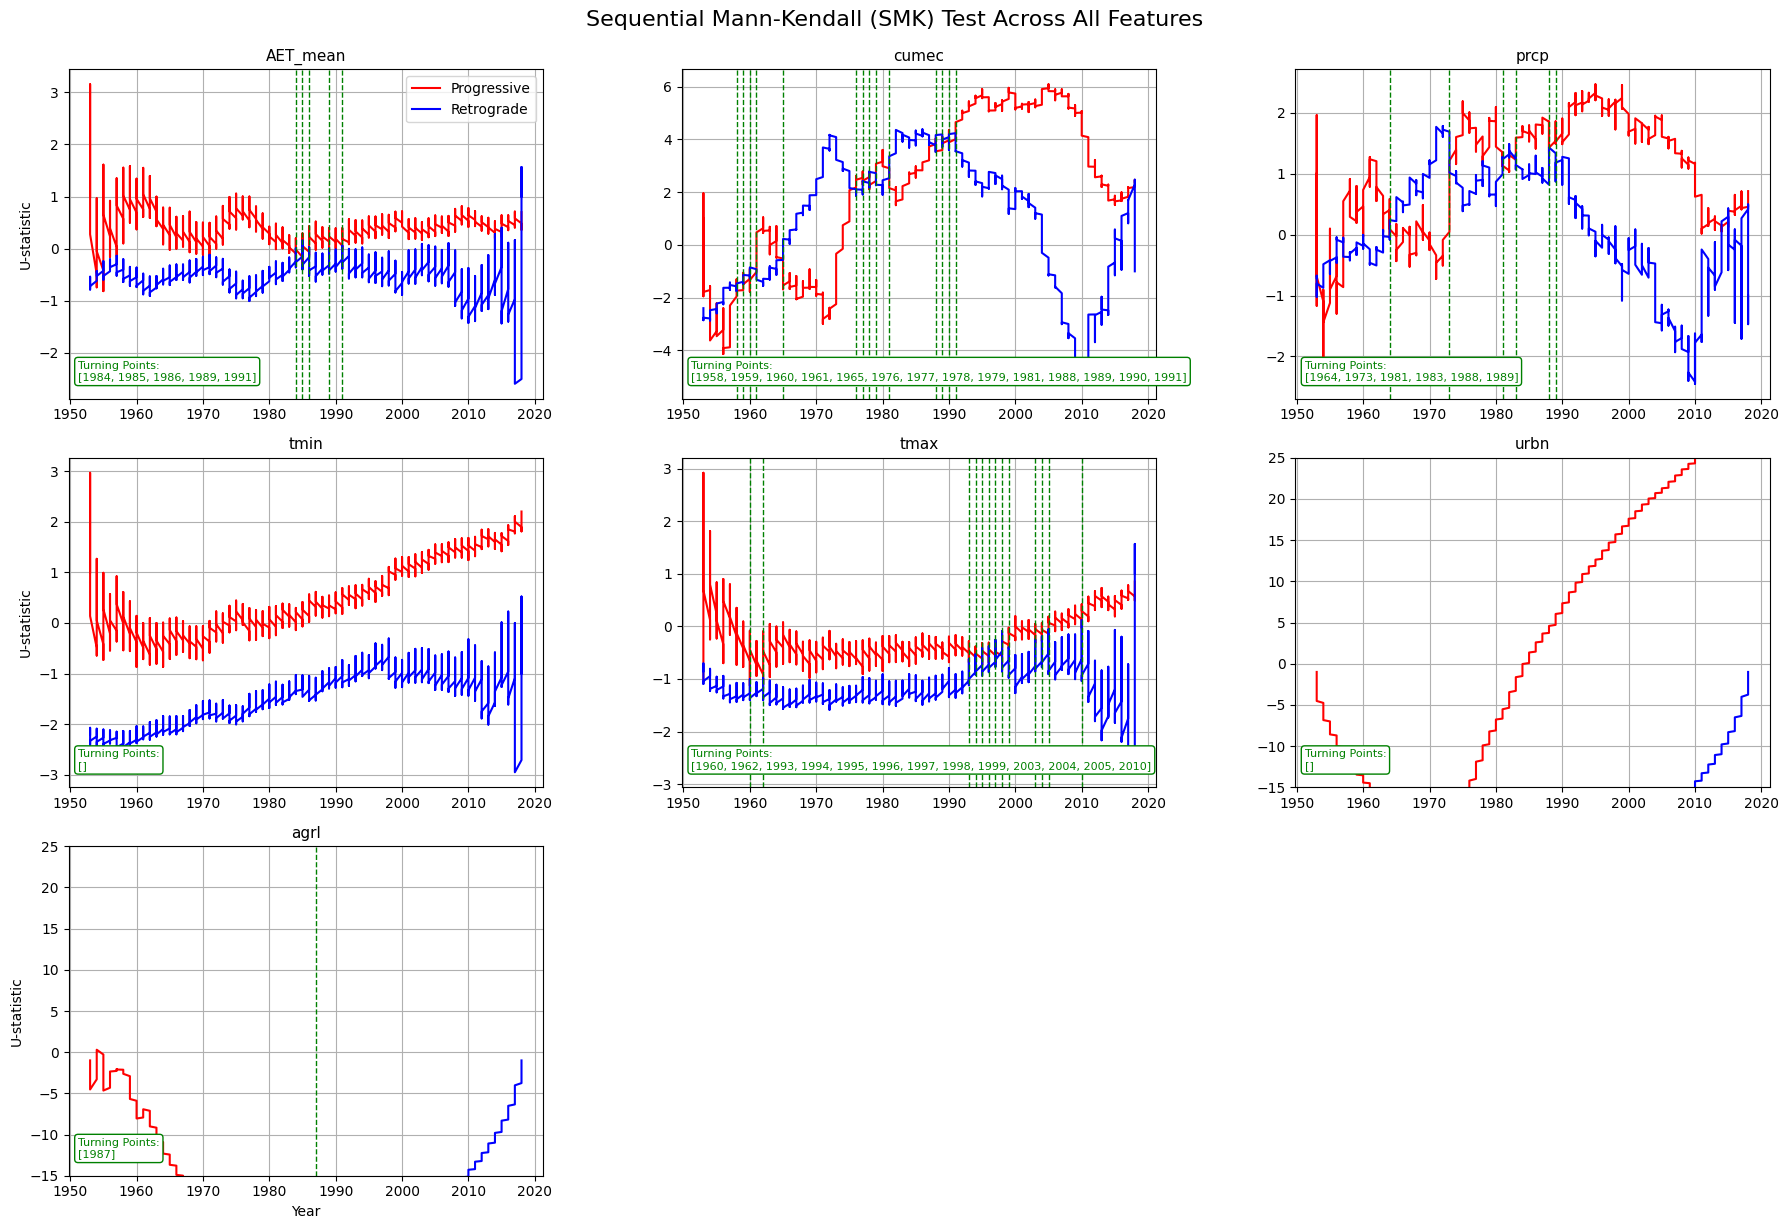

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df_monthly = pd.read_csv("df_monthly.csv")

features = ['AET_mean', 'cumec', 'prcp', 'tmin', 'tmax',
             'urbn', 'agrl']

cols = 3
rows = math.ceil(len(features) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(features):
    ax = axes[idx]
    data_array = df_monthly[['year', feature]].to_numpy()
    result = seq_mk(data_array)

    year = result['year']
    u_prog = result['u_prog']
    u_retr = result['u_retr']

    # Determine first and last 5 years to exclude
    min_year, max_year = year.min(), year.max()
    exclude_range = 4
    valid_turning = sorted(set(
    result[
        (result['turning_point'] == 1) &
        (result['year'] > min_year + exclude_range) &
        (result['year'] < max_year - exclude_range)
    ]['year'].astype(int)
))

    # Plot lines
    ax.plot(year, u_prog, 'r', label='Progressive')
    ax.plot(year, u_retr, 'b', label='Retrograde')

    # Plot turning points
    for ty in valid_turning:
        ax.axvline(ty, color='green', linestyle='--', linewidth=1)
    # Add turning point list as text
    tp_text = f"Turning Points:\n{valid_turning}"
    ax.text(0.02, 0.05, tp_text,
            transform=ax.transAxes,
            fontsize=8, color='green',
            verticalalignment='bottom',
            bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.3'))

    # Rescale y-axis for extreme cases
    if feature in ['urbn', 'agrl']:
        ax.set_ylim(-15, 25)  # tweak as needed

    ax.set_title(f"{feature}", fontsize=11)
    ax.grid(True)

    if idx % cols == 0:
        ax.set_ylabel("U-statistic")
    if idx >= (rows - 1) * cols:
        ax.set_xlabel("Year")

# Delete unused axes
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
fig.suptitle("Sequential Mann-Kendall (SMK) Test Across All Features", fontsize=16, y=1.02)
axes[0].legend(loc='upper right')
plt.show()

In [247]:
df_monthly['urban_precip'] = df_monthly['urbn'] * df_monthly['prcp']
df_monthly['urban_tmin'] = df_monthly['urbn'] * df_monthly['tmin']

In [248]:
df_monthly.head()

,year,month,AET_mean,Base flow (cumec),cumec,prcp,tmin,tmax,urbn,agrl,past,fomi,rnge,season_Autumn,season_Spring,season_Summer,season_Winter,urban_precip,urban_tmin
0,1953,1,0.583884,1.910381,2.477263,2.451741,4.776238,18.717121,0.0,0.0,0.0197,0.8917,0.0,False,False,False,True,0.0,0.0
1,1953,2,0.816403,6.706953,8.405033,6.489219,5.023421,16.718589,0.0,0.0,0.0197,0.8917,0.0,False,False,False,True,0.0,0.0
2,1953,3,0.946147,3.309123,4.121465,3.062908,12.463922,23.972142,0.0,0.0,0.0197,0.8917,0.0,False,True,False,False,0.0,0.0
3,1953,4,1.284196,11.491697,15.090967,9.570047,11.506437,25.207965,0.0,0.0,0.0197,0.8917,0.0,False,True,False,False,0.0,0.0
4,1953,5,2.992212,18.721938,23.146700,11.184686,17.678627,29.080061,0.0,0.0,0.0197,0.8917,0.0,False,True,False,False,0.0,0.0


In [249]:
intervals

[(1953, 1963), (1963, 1976), (1976, 1992), (1992, 2003), (2003, 2018)]

[1958, 1959, 1960, 1961, 1963, 1964, 1976, 1977, 1978, 1979, 1980, 1992, 1993, 1996, 1997, 1998, 2000, 2003, 2004]
 Processing interval: 1953 to 1963
 Processing interval: 1963 to 1976
 Processing interval: 1976 to 1992
 Processing interval: 1992 to 2003
 Processing interval: 2003 to 2018


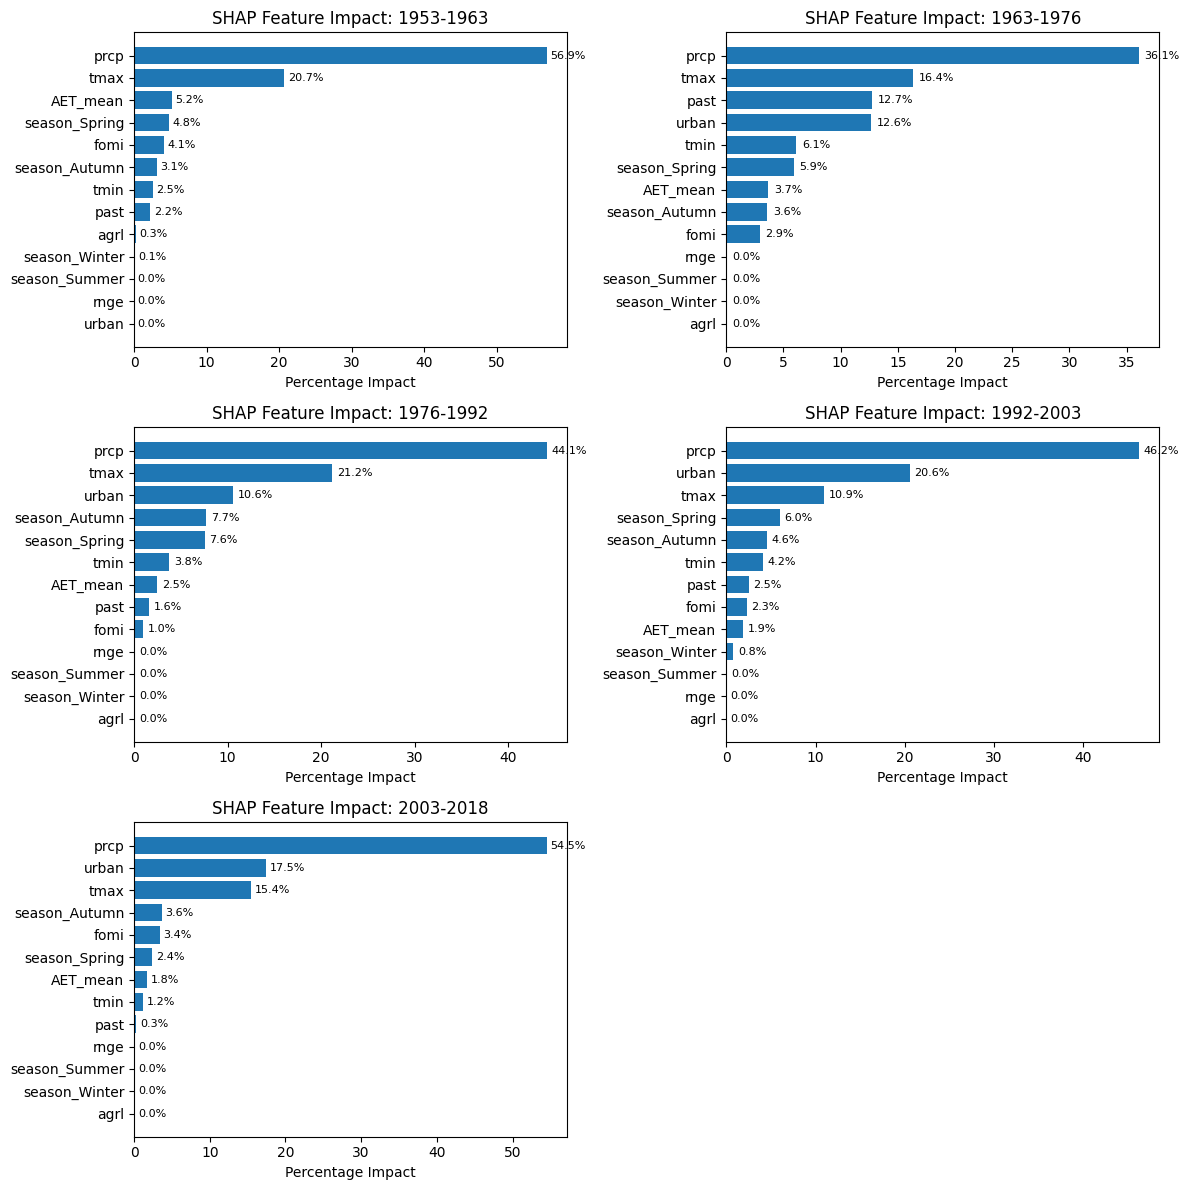

In [307]:
df_monthly = df_monthly.copy()
print(turning_points)
target = 'cumec'
features = [col for col in df_monthly.columns if col not in ['year', target, 'Base flow (cumec)', 'month']]
group_map = {
    "urban": ["urban_precip", "urbn", "urban_tmin"]
}

# Best model params
best_params = {
    'colsample_bytree': 1,
    'learning_rate': 0.01,
    'max_depth': 3,
    'n_estimators': 300,
    'subsample': 0.8
}

intervals = intervals

# Function to compute percentage impact
def get_percentage_impact(shap_vals, columns, group_map):
    df_shap = pd.DataFrame(shap_vals, columns=columns)
    grouped_shap = {}

    for group_name, feature_list in group_map.items():
        grouped_shap[group_name] = df_shap[feature_list].abs().sum(axis=1)

    for col in columns:
        if not any(col in v for v in group_map.values()):
            grouped_shap[col] = df_shap[col].abs()

    grouped_df = pd.DataFrame(grouped_shap)
    mean_abs = grouped_df.mean()
    pct = 100 * mean_abs / mean_abs.sum()
    return pct.sort_values()

# Store all results
interval_importances = {}

for start, end in intervals:
    print(f" Processing interval: {start} to {end}")

    df_interval = df_monthly[(df_monthly['year'] >= start) & (df_monthly['year'] < end)]
    X = df_interval[features].copy()
    y = df_interval[target]
    bool_cols = X.select_dtypes(include='bool').columns
    X[bool_cols] = X[bool_cols].astype(int)

    model = xgb.XGBRegressor(**best_params, random_state=42)
    model.fit(X, y)

    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)

    # SHAP values array
    shap_vals = shap_values.values if hasattr(shap_values, 'values') else shap_values

    impact = get_percentage_impact(shap_vals, features, group_map)
    interval_importances[f"{start}-{end}"] = impact

# =======================
# Plot All Intervals
# =======================
n_intervals = len(interval_importances)
n_cols = 2
n_rows = math.ceil(n_intervals / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows), sharex=False)
axes = axes.flatten()

for ax, (interval, imp) in zip(axes, interval_importances.items()):
    ax.barh(imp.index, imp.values)
    ax.set_title(f"SHAP Feature Impact: {interval}")
    ax.set_xlabel("Percentage Impact")
    for i, v in enumerate(imp.values):
        ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=8)

# Remove unused subplots if any
for i in range(len(interval_importances), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# fig, axes = plt.subplots(nrows=len(interval_importances), figsize=(12, len(interval_importances)*3), sharex=True)

# for ax, (interval, imp) in zip(axes, interval_importances.items()):
#     ax.barh(imp.index, imp.values)
#     ax.set_title(f"SHAP Feature Impact: {interval}")
#     ax.set_xlabel("Percentage Impact")
#     for i, v in enumerate(imp.values):
#         ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=8)

# plt.tight_layout()
# plt.show();
